# Bank Risk Analysis

## Project Overview:

Loan-providing companies often face challenges in approving loans for individuals with insufficient or non-existent credit history. This creates an opportunity for some individuals to exploit the system by defaulting on their loans. To address this issue, the project focuses on aiding a consumer finance company specializing in urban loans.

The **objective** of the project is to perform Exploratory Data Analysis (EDA) to identify patterns in the data. These insights will help ensure that deserving applicants capable of repaying loans are not rejected, while minimizing the financial risks associated with approving loans for high-risk applicants.

When a loan application is received, the company must make decisions based on the applicant’s profile. This decision involves two critical risks:

1. **Business Loss Risk:** If an applicant who is likely to repay the loan is rejected, the company loses potential business.
2. **Financial Loss Risk:** If an applicant who is likely to default is approved, the company incurs financial losses.

By analyzing the data effectively, this project aims to optimize the loan approval process and strike a balance between business growth and risk management.

**Case Study Objective:**

This case study aims to identify patterns that indicate whether a client may face difficulty in paying their loan installments. These insights can guide the company in making informed decisions, such as:

- Denying loans to high-risk applicants,
- Reducing the loan amount offered,
- Offering loans to risky applicants at higher interest rates.

By leveraging Exploratory Data Analysis (EDA), the study seeks to ensure that consumers capable of repaying loans are not unfairly rejected. The primary goal is to optimize the loan approval process while minimizing financial risks and maximizing business opportunities.

## Importing Imp Libraries

In [508]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.style as style 
import seaborn as sns
import itertools
%matplotlib inline 

# setting up plot style 
# style.use('seaborn-poster')
# style.use('fivethirtyeight')

In [509]:
# Importing Warnings 
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [510]:
Application_df = pd.read_csv(r"C:\Users\ratho\.ipynb_checkpoints\DATA\application_data.csv")
Previous_application_df = pd.read_csv(r"C:\Users\ratho\.ipynb_checkpoints\DATA\previous_application.csv")

## Data Quick Check

In [511]:
Application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [512]:
Previous_application_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [513]:
Application_df.shape , Previous_application_df.shape

((307511, 122), (1670214, 37))

In [514]:
Application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [515]:
Previous_application_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [516]:
Application_df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [517]:
Previous_application_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [518]:
Application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [519]:
Previous_application_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Application data null value Analysis

In [520]:
Application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [521]:
Previous_application_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [522]:
import sys
!{sys.executable} -m pip install missingno

# The missingno library is used for visualizing missing data in a DataFrame. It helps in identifying patterns of missing data.

<Axes: >

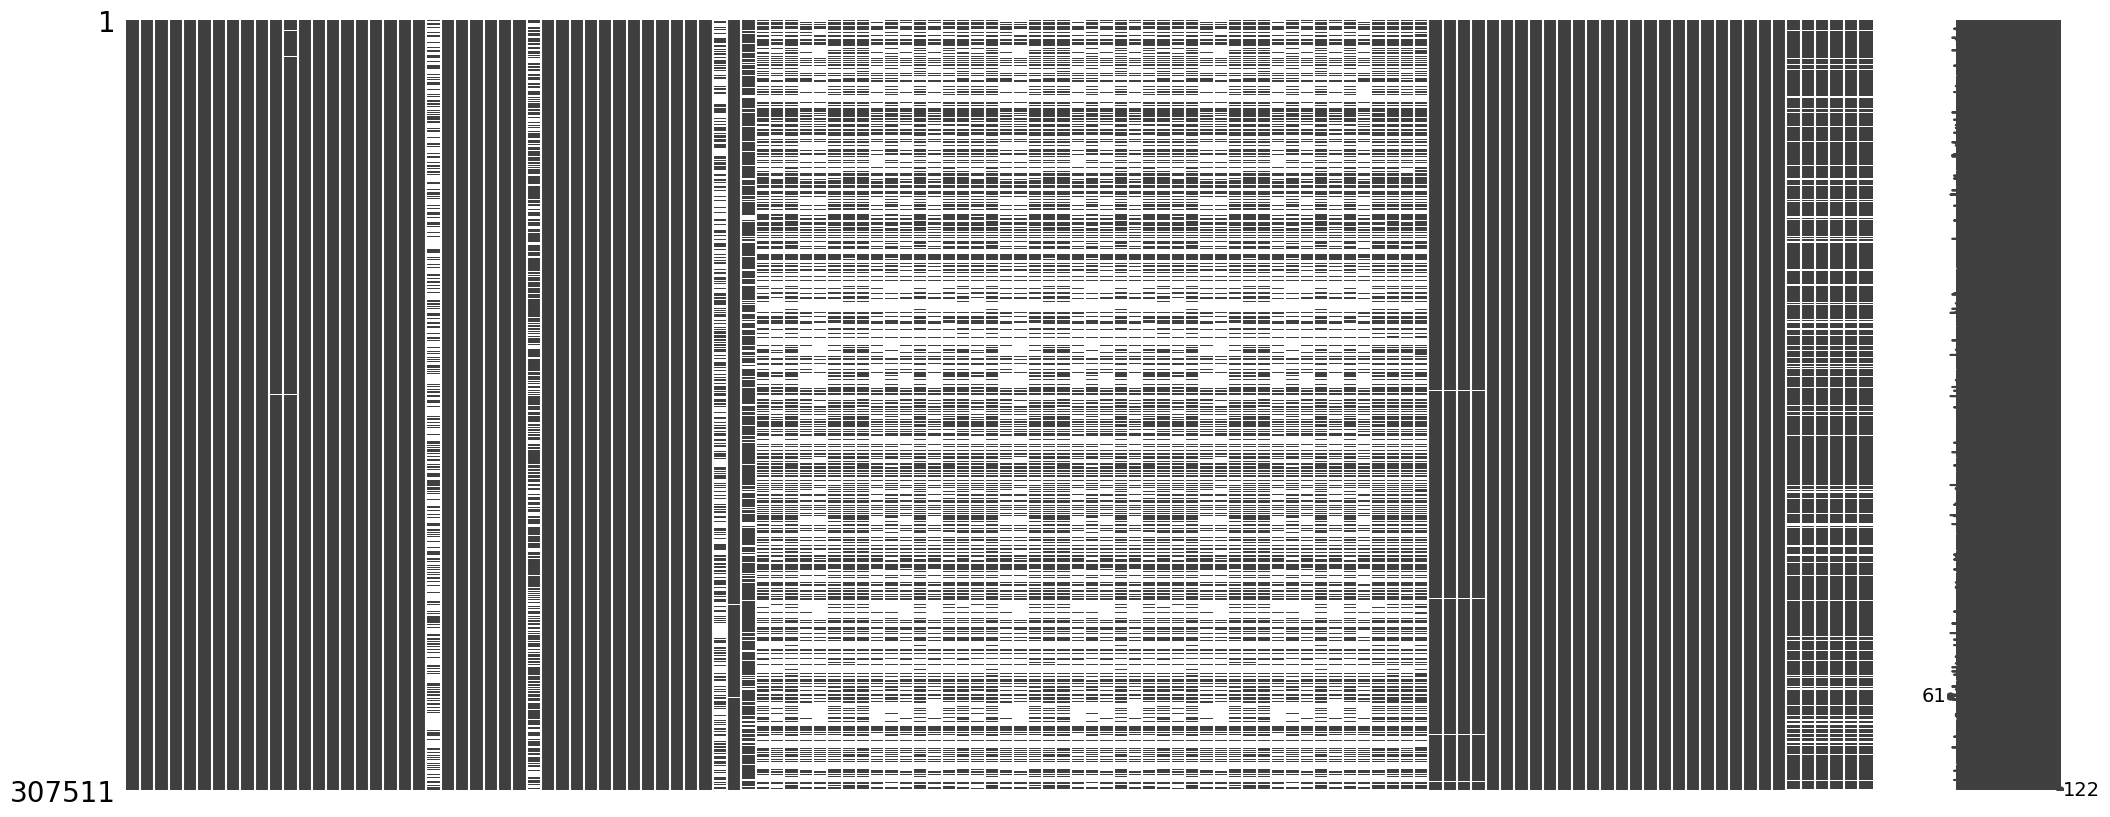

In [523]:
import missingno as mn 
# Visualize missing data
mn.matrix(Application_df) 
# Replace `applicationDF` with your DataFrame

**The `Application_dF` DataFrame contains several columns with more than 40% missing values. To visualize this, we can plot the columns against their percentage of missing values, using 40% as the cut-off mark.**

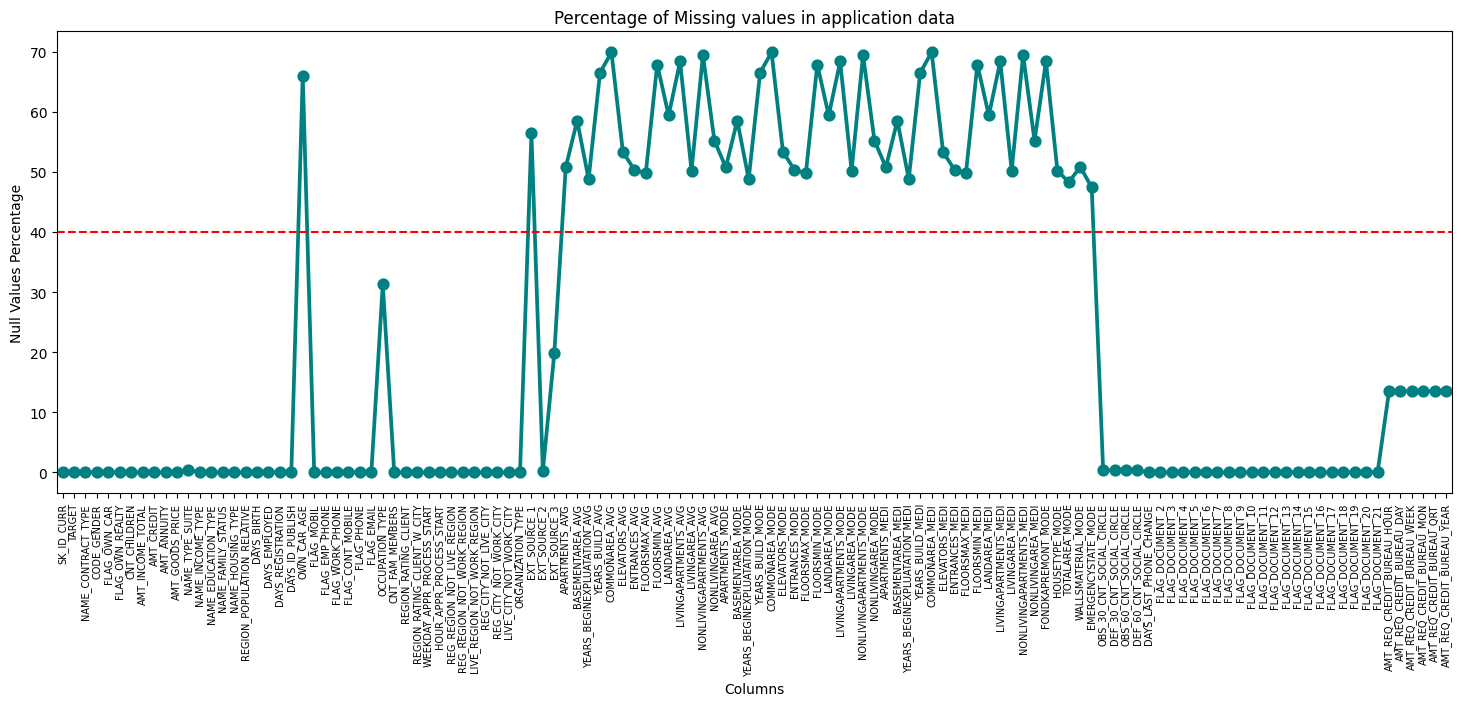

In [524]:
Nullvalues_Application = pd.DataFrame((Application_df.isnull().sum())*100/Application_df.shape[0]).reset_index()
# Counts the number of missing (null) values in each column of applicationDF.
# Converts the counts to percentages by dividing by the total number of rows (applicationDF.shape[0]) and multiplying by 100.
# Creates a new DataFrame from the results and resets the index to make the column names part of the data.

Nullvalues_Application.columns = ['Column Name','Null Values Percentage']
# Renames the columns to more descriptive names

fig = plt.figure(figsize =(18,6))
ax = sns.pointplot(x = 'Column Name', y = 'Null Values Percentage', data = Nullvalues_Application, color = 'teal')
plt.xticks(rotation = 90, fontsize = 7)
ax.axhline(40, ls = '--', color = 'red')


plt.title('Percentage of Missing values in application data')
plt.ylabel("Null Values Percentage")
plt.xlabel("Columns")
plt.show()

**From the plot, we observe that columns with more than 40% null values are positioned above the red line, while those with less than 40% null values are below the red line. Next, let's identify the columns with more than 40% missing values.**

In [525]:
Nullcol_more40per_application = Nullvalues_Application[Nullvalues_Application['Null Values Percentage']>= 40]
Nullcol_more40per_application

# here we are fetching that columns , whoes rows are empty more than 40 %

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [526]:
# count that columns having more than 40 % null values in it 
len(Nullcol_more40per_application)

49

**Insight:**
A total of 49 columns have more than 40% null values. Most of these columns appear to be related to different area sizes of apartments owned or rented by loan applicants. This indicates that property-related data might not be consistently available or applicable to all applicants, possibly due to variations in ownership status or incomplete documentation.

## Previous Application data Null Values Analysis

<Axes: >

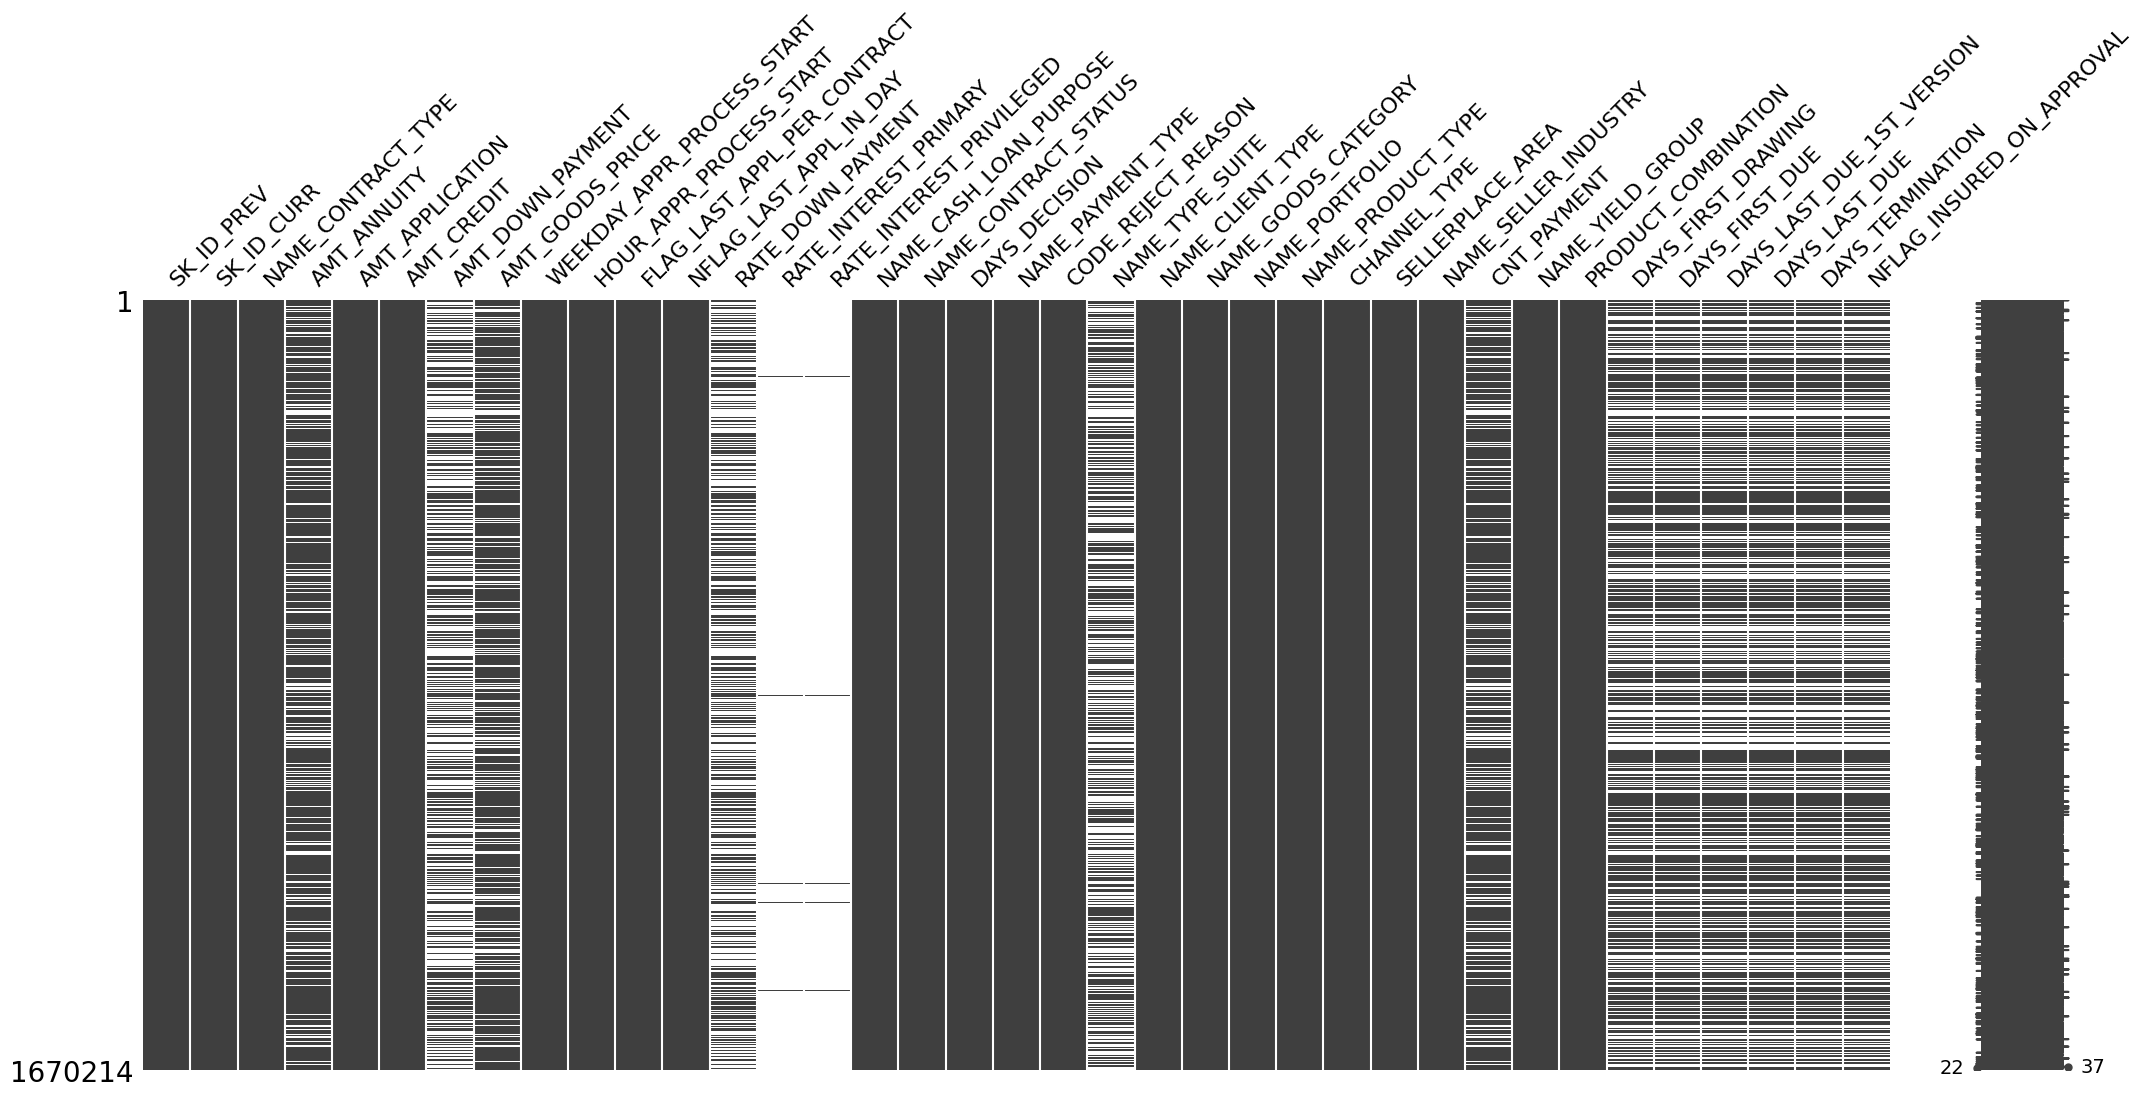

In [527]:
mn.matrix(Previous_application_df)

In [528]:
round(Previous_application_df.isnull().sum() / Previous_application_df.shape[0] * 100.00 , 2)

# here we are checking null value % in each column in Previous_application_df

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

**There are many columns in previousDF dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks**

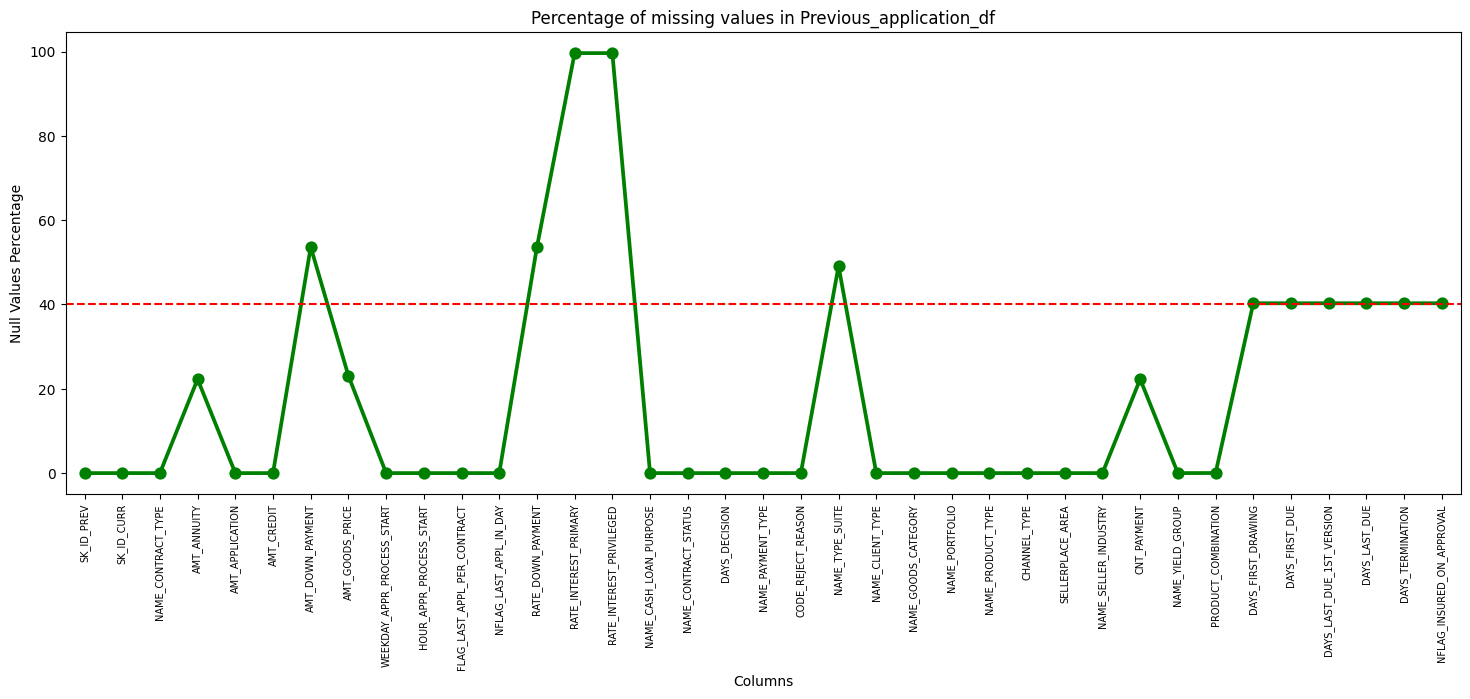

In [529]:
Nullvalues_Previous_app = pd.DataFrame((Previous_application_df.isnull().sum())*100 / Previous_application_df.shape[0]).reset_index()
Nullvalues_Previous_app.columns = ['Column Name','Null Value Percentage']

fig = plt.figure(figsize = (18,6))
ax = sns.pointplot(x = 'Column Name', y = 'Null Value Percentage', data = Nullvalues_Previous_app, color = 'green')
plt.xticks(rotation = 90 , fontsize = 7)
ax.axhline(40, ls = '--', color = 'red')
plt.title("Percentage of missing values in Previous_application_df")
plt.xlabel("Columns")
plt.ylabel('Null Values Percentage')
plt.show()

**From the plot, we can observe that columns with more than 40% null values are positioned above the red line, while those with less than 40% null values are below the red line. Now, let's focus on the columns that have more than 40% missing values.**

In [530]:

Nullcol_more40per_Previous = Nullvalues_Previous_app[Nullvalues_Previous_app['Null Value Percentage'] >= 40]
Nullcol_more40per_Previous

# here we are fetching more than or equal to 40 % of null valaues columns 

,Column Name,Null Value Percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [531]:
# total count of columns more than or equal to 40 % null values in it 

len(Nullcol_more40per_Previous)

11

**There are a total of 11 columns with more than 40% null values. These columns are potential candidates for deletion due to their high proportion of missing data. However, before removing them, it's essential to review the remaining columns to check if there are any others that can also be dropped based on their relevance or missing data percentage. This will help ensure that only the necessary columns are retained for further analysis.**

## Unnecessary Columns Analysis in Application_df

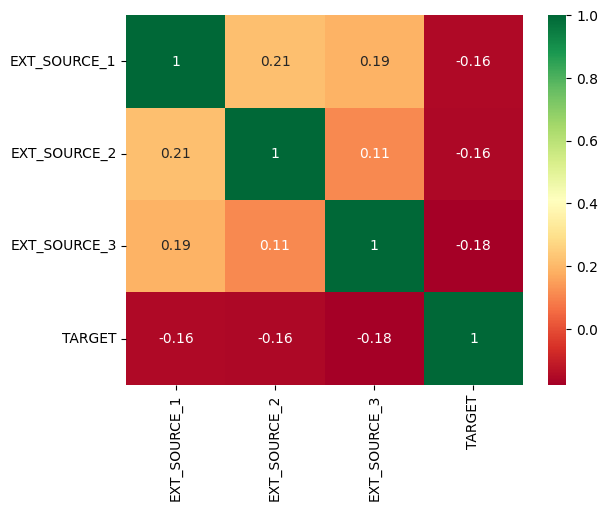

In [532]:
# checking columns having null values are having any correlation with target columns or not 

Source = Application_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
                 annot = True,
                 cmap = "RdYlGn")

**Based on the heatmap, there is minimal correlation between the `EXT_SOURCE_X` columns and the target column. Therefore, these columns can be dropped. Additionally, `EXT_SOURCE_1` has approximately 56% missing values, while `EXT_SOURCE_3` has around 20% missing values.**

In [533]:
# WE wanted to drop those columns which are having >40% nul values in it 
# 1st create list 
Unwantedcol_applicationdf = Nullcol_more40per_application['Column Name'].tolist()

# as we can see EXT_SOURCE_1 col is already exist in list , we wanted to add 2 ND 3 ALSO 
total_len_unwantedcol = Unwantedcol_applicationdf + ['EXT_SOURCE_2','EXT_Source_3']
len(total_len_unwantedcol)

51

In [534]:
# now we will check Relevant Flag Documents
# and we will see is there any relation of these doc with Loan Repament Status

Doc_col = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

flag = Application_df[Doc_col + ['TARGET']]

length = len(Doc_col)

flag['TARGET'] = flag['TARGET'].replace({1:'Defaulter', 0:"Repayer"})

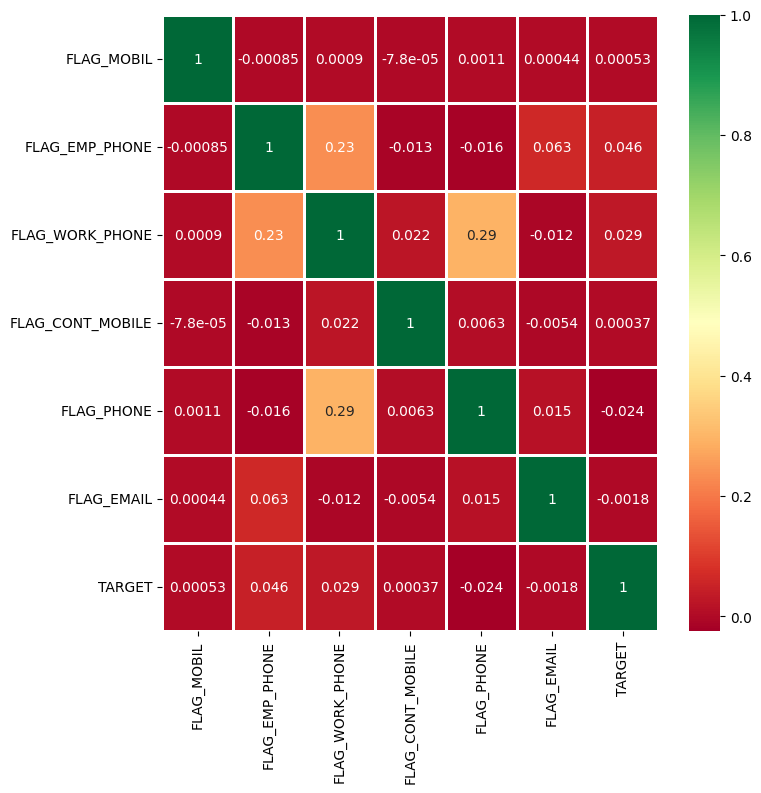

In [535]:
# Checking is there any correlation between mobile phone, work phone etc, emil, family members nd Region rating 
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = Application_df[contact_col].corr()
fig = plt.figure(figsize = (8,8))
ax = sns.heatmap(Contact_corr,
                xticklabels = Contact_corr.columns,
                yticklabels = Contact_corr.columns,
                annot = True,
                cmap = "RdYlGn",
                linewidth = 1)

**The flags for mobile phone, email, and similar attributes show no correlation with loan repayment status. Therefore, these columns can be removed from the dataset to simplify the analysis and focus on more relevant features.**

In [536]:

contact_col

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'TARGET']

In [537]:
# including the 6 FLAG columns to be deleted 
contact_col.remove('TARGET')
total_len_unwantedcol = total_len_unwantedcol + contact_col
len(total_len_unwantedcol)

57

In [538]:
total_len_unwantedcol

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [539]:
# Dropping the unnecessary columns from Application_Df
Application_df.drop(labels = total_len_unwantedcol, axis = 1, inplace = True)

KeyError: "['EXT_Source_3'] not found in axis"

In [540]:
# Ensure all columns in total_len_unwantedcol exist in Application_df
columns_to_drop = [col for col in total_len_unwantedcol if col in Application_df.columns]

# Dropping the unnecessary columns
Application_df.drop(labels=columns_to_drop, axis=1, inplace=True)


In [541]:
Application_df.shape

(307511, 66)

In [542]:
Application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [543]:
Unwanted_Previous = Nullcol_more40per_Previous['Column Name'].tolist()
Unwanted_Previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [544]:
Previous_application_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [545]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [546]:
Unwanted_Previous = Unwanted_Previous + Unnecessary_previous
len(Unwanted_Previous)

15

In [547]:
# We have to delet that unecessary columns form previous table
Previous_application_df.drop(labels = Unwanted_Previous, axis = 1 , inplace = True)
# Inspecting dataframe after removal of unnecessary columns
Previous_application_df.shape

(1670214, 22)

In [548]:
# checking column types 
Previous_application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

# Standardizing Values 

In [549]:
Date = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in Date:
    Application_df[col] = abs(Application_df[col])

The code deals with date columns that store information as negative values (possibly indicating the number of days before the current date). To make the data easier to interpret, it converts these negative values into positive numbers.

In [550]:
# To categorize the income values in AMT_INCOME_TOTAL into predefined ranges (bins) 
# for easier analysis and segmentation.
Application_df['AMT_INCOME_TOTAL']= Application_df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

Application_df['AMT_INCOME_RANGE'] = pd.cut(Application_df['AMT_INCOME_TOTAL'],bins,labels= slot)        

In [551]:
# check % bin data 
Application_df['AMT_INCOME_RANGE'].value_counts(normalize = True)*100

AMT_INCOME_RANGE
100k-200k    50.735000
200k-300k    21.210691
0-100k       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: proportion, dtype: float64

**More than half of the loan applicants (over 50%) fall into the income range of 100K-200K, indicating that this category encompasses the largest portion of the population. Additionally, a significant majority of applicants (approximately 92%) have an income less than 300K, demonstrating that the loan applicant base predominantly consists of individuals in the lower to mid-income brackets.**

In [552]:
# creating bins for credit amount 
Application_df['AMT_CREDIT'] = Application_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100k','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

Application_df['AMT_CREDIT_RANGE'] = pd.cut(Application_df['AMT_CREDIT'],bins=bins,labels=slots)

In [553]:
# check % bin data of each category
Application_df['AMT_CREDIT_RANGE'].value_counts(normalize = True)*100

AMT_CREDIT_RANGE
200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100k        1.952450
Name: proportion, dtype: float64

**More than 16% of loan applicants have taken loans exceeding 1M, highlighting a significant portion of high-value loans in the dataset. This suggests that while the majority of loans are likely smaller, a considerable number of applicants fall into the high-loan category, potentially indicating a diverse range of financial needs or borrower profiles.**

In [554]:
# Creating bins for Age
Application_df['AGE'] = Application_df['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

Application_df['AGE_GROUP']=pd.cut(Application_df['AGE'],bins=bins,labels=slots)

In [555]:
#checking the binning of data and % of data in each category
Application_df['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: proportion, dtype: float64

**Approximately 31% of loan applicants are aged above 50 years, indicating a considerable representation of older individuals among the applicants. Additionally, more than 55% of applicants are aged over 40 years, suggesting that middle-aged and older individuals constitute the majority of the loan applicant base.**

In [556]:
# Creating bins for Age
Application_df['YEARS_EMPLOYED'] = Application_df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

Application_df['EMPLOYMENT_YEAR']=pd.cut(Application_df['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [557]:
#checking the binning of data and % of data in each category
Application_df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

EMPLOYMENT_YEAR
0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: proportion, dtype: float64

**More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience**

In [558]:
Application_df.nunique().sort_values()

REG_REGION_NOT_LIVE_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
                                ...  
DAYS_EMPLOYED                   12574
AMT_ANNUITY                     13672
DAYS_REGISTRATION               15688
DAYS_BIRTH                      17460
SK_ID_CURR                     307511
Length: 72, dtype: int64

In [559]:
Application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

**The numeric columns in the dataset are already in int64 and float64 formats. Therefore, we will proceed with analyzing and processing the other columns.**

# Seperating categorical and Numerical values 

In [560]:
Cat_col = Application_df.select_dtypes(include = 'object').columns

Num_col = Application_df.select_dtypes(exclude = 'object').columns



In [561]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    Application_df[col] =pd.Categorical(Application_df[col])

In [562]:
Application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [563]:
Previous_application_df.nunique().sort_values()

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [564]:
Application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [565]:
# converting negative days into positive days in Previous application table 
Previous_application_df['DAYS_DECISION'] = abs(Previous_application_df['DAYS_DECISION'])

In [566]:
Previous_application_df['DAYS_DECISION_GROUP'] = (Previous_application_df['DAYS_DECISION']-(Previous_application_df['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((Previous_application_df['DAYS_DECISION'] - (Previous_application_df['DAYS_DECISION'] % 400)) + (Previous_application_df['DAYS_DECISION'] % 400) + (400 - (Previous_application_df['DAYS_DECISION'] % 400))).astype(str)

In [567]:
Previous_application_df['DAYS_DECISION_GROUP'].value_counts(normalize = True)*100

DAYS_DECISION_GROUP
0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: proportion, dtype: float64

In [568]:
# To optimize the storage and processing of categorical data 
# by explicitly converting them from object type (default for strings) to the categorical type.

Prev_catcol= ['NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 
                    'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 
                    'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 
                    'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE', 'DAYS_DECISION_GROUP']

for col in Prev_catcol:
        Previous_application_df[col] =pd.Categorical(Previous_application_df[col])


In [569]:
Previous_application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

In [570]:
# checking the null value % of each column in application df 
round(Application_df.isnull().sum() / Application_df.shape [0] * 100.00,2)

SK_ID_CURR             0.00
TARGET                 0.00
NAME_CONTRACT_TYPE     0.00
CODE_GENDER            0.00
FLAG_OWN_CAR           0.00
                      ...  
AMT_CREDIT_RANGE       0.00
AGE                    0.00
AGE_GROUP              0.00
YEARS_EMPLOYED         0.00
EMPLOYMENT_YEAR       27.08
Length: 72, dtype: float64

In [571]:
Application_df['NAME_TYPE_SUITE'].fillna((Application_df['NAME_TYPE_SUITE'].mode()[0]), inplace = True)

In [572]:
Application_df['OCCUPATION_TYPE'] = Application_df['OCCUPATION_TYPE'].cat.add_categories('Unknown')
Application_df['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)


**Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:**

In [573]:
Application_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### Impute with median as mean has decimals and this number of requests

In [574]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    Application_df[col].fillna(Application_df[col].median(), inplace = True)

In [575]:
# check null value % in application df 
round(Application_df.isnull().sum() / Previous_application_df.shape[0] * 100.00, 2)

SK_ID_CURR            0.00
TARGET                0.00
NAME_CONTRACT_TYPE    0.00
CODE_GENDER           0.00
FLAG_OWN_CAR          0.00
                      ... 
AMT_CREDIT_RANGE      0.00
AGE                   0.00
AGE_GROUP             0.00
YEARS_EMPLOYED        0.00
EMPLOYMENT_YEAR       4.99
Length: 72, dtype: float64

In [576]:
# check null value % in previous df 
round(Previous_application_df.isnull().sum() / Previous_application_df.shape[0] * 100.00,2)


SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

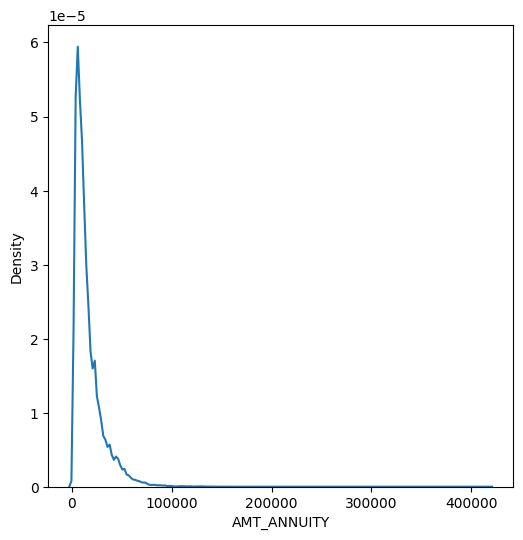

In [577]:
plt.figure(figsize = (6,6))
sns.kdeplot(Previous_application_df['AMT_ANNUITY'])
plt.show()

**The distribution shows a single peak on the left side, indicating a right-skewed distribution and the presence of outliers. Since the mean is sensitive to outliers and does not accurately represent the central tendency in such cases, imputing missing values with the mean would not be appropriate. Therefore, the median, which is robust to outliers, is a better choice for imputing missing values.**

In [580]:
Previous_application_df['AMT_ANNUITY'].fillna(Previous_application_df['AMT_ANNUITY'].median(),inplace = True)

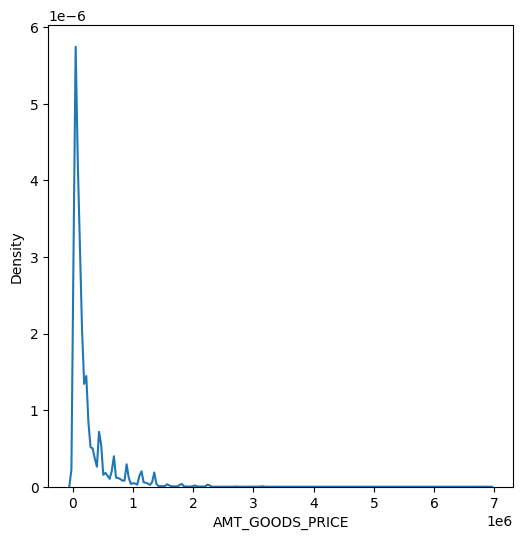

In [581]:
plt.figure(figsize=(6,6))
sns.kdeplot(Previous_application_df['AMT_GOODS_PRICE'][pd.notnull(Previous_application_df['AMT_GOODS_PRICE'])])
plt.show()

**The distribution exhibits several peaks, suggesting it may have a multimodal nature. To preserve the original shape and characteristics of the data, we will impute missing values using three different approaches—mode, mean, and median—and compare the resulting distributions to assess whether they remain similar to the original.**

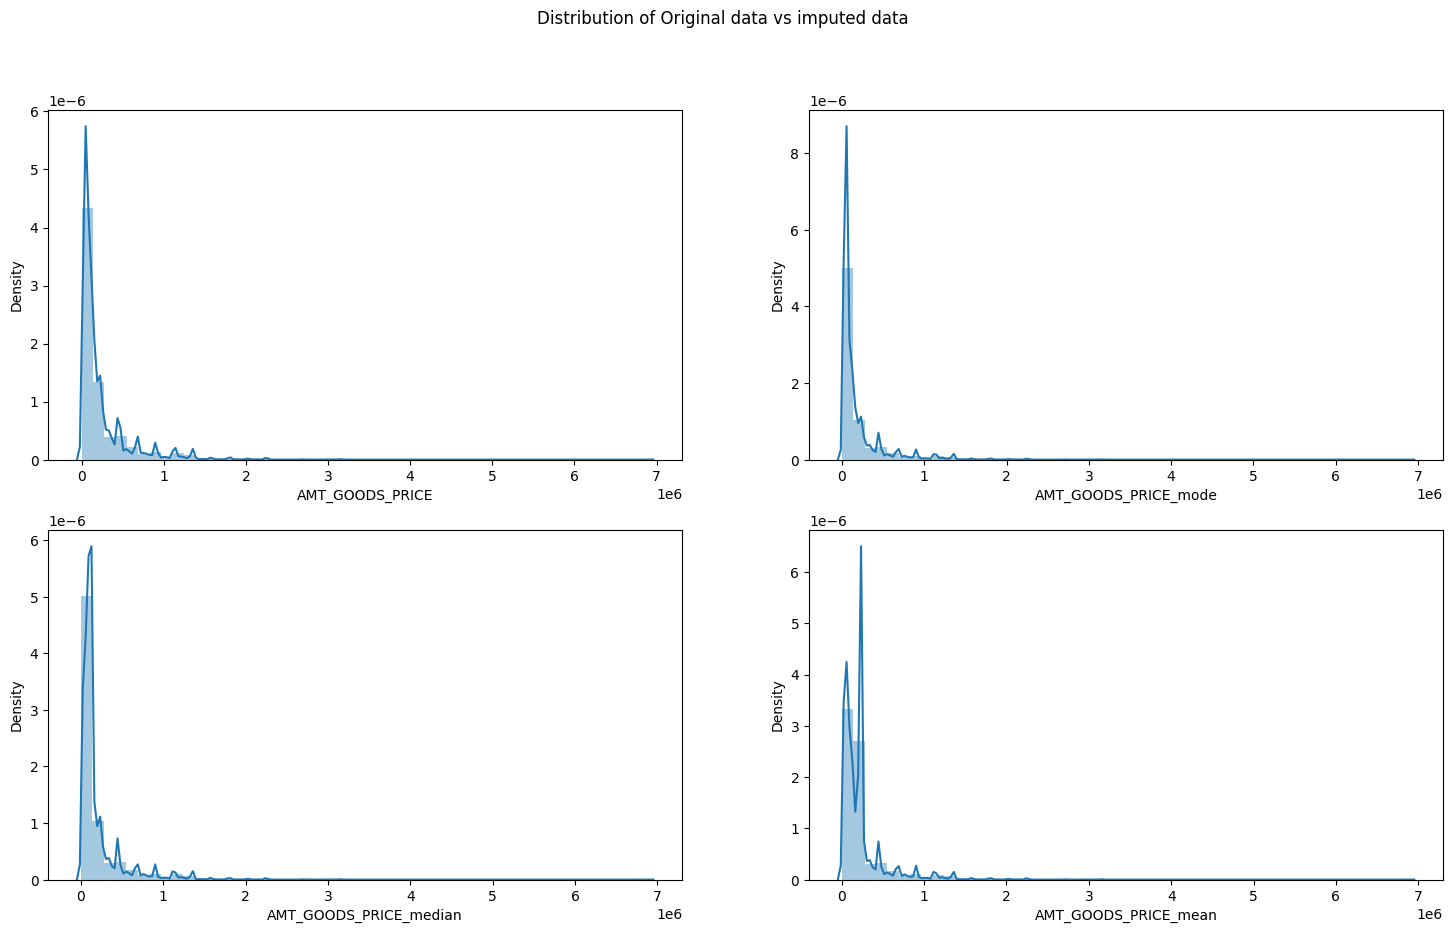

In [583]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = Previous_application_df['AMT_GOODS_PRICE'].fillna(Previous_application_df['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = Previous_application_df['AMT_GOODS_PRICE'].fillna(Previous_application_df['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = Previous_application_df['AMT_GOODS_PRICE'].fillna(Previous_application_df['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(Previous_application_df['AMT_GOODS_PRICE'][pd.notnull(Previous_application_df['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

**The original distribution is closer with the distribution of data imputed with mode in this case**

In [584]:
Previous_application_df['AMT_GOODS_PRICE'].fillna(Previous_application_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [585]:
#checking the null value % OF each column in previousdf 
round(Previous_application_df.isnull().sum() / Previous_application_df.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY                0.00
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE            0.00
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

In [586]:
Previous_application_df.loc[Previous_application_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

In [587]:
Previous_application_df['CNT_PAYMENT'].fillna(0,inplace = True)

In [588]:
# checking null values 
round(Previous_application_df).isnull().sum() / Previous_application_df.shape[0] *100.00,2

(SK_ID_PREV                0.000000
 SK_ID_CURR                0.000000
 NAME_CONTRACT_TYPE        0.000000
 AMT_ANNUITY               0.000000
 AMT_APPLICATION           0.000000
 AMT_CREDIT                0.000060
 AMT_GOODS_PRICE           0.000000
 NAME_CASH_LOAN_PURPOSE    0.000000
 NAME_CONTRACT_STATUS      0.000000
 DAYS_DECISION             0.000000
 NAME_PAYMENT_TYPE         0.000000
 CODE_REJECT_REASON        0.000000
 NAME_CLIENT_TYPE          0.000000
 NAME_GOODS_CATEGORY       0.000000
 NAME_PORTFOLIO            0.000000
 NAME_PRODUCT_TYPE         0.000000
 CHANNEL_TYPE              0.000000
 SELLERPLACE_AREA          0.000000
 NAME_SELLER_INDUSTRY      0.000000
 CNT_PAYMENT               0.000000
 NAME_YIELD_GROUP          0.000000
 PRODUCT_COMBINATION       0.020716
 DAYS_DECISION_GROUP       0.000000
 dtype: float64,
 2)

**There are still a few null values in the `PRODUCT_COMBINATION` column. However, since the percentage of missing values is minimal, it can be safely ignored without significantly impacting the analysis or results.**

## Identifyting Outliers

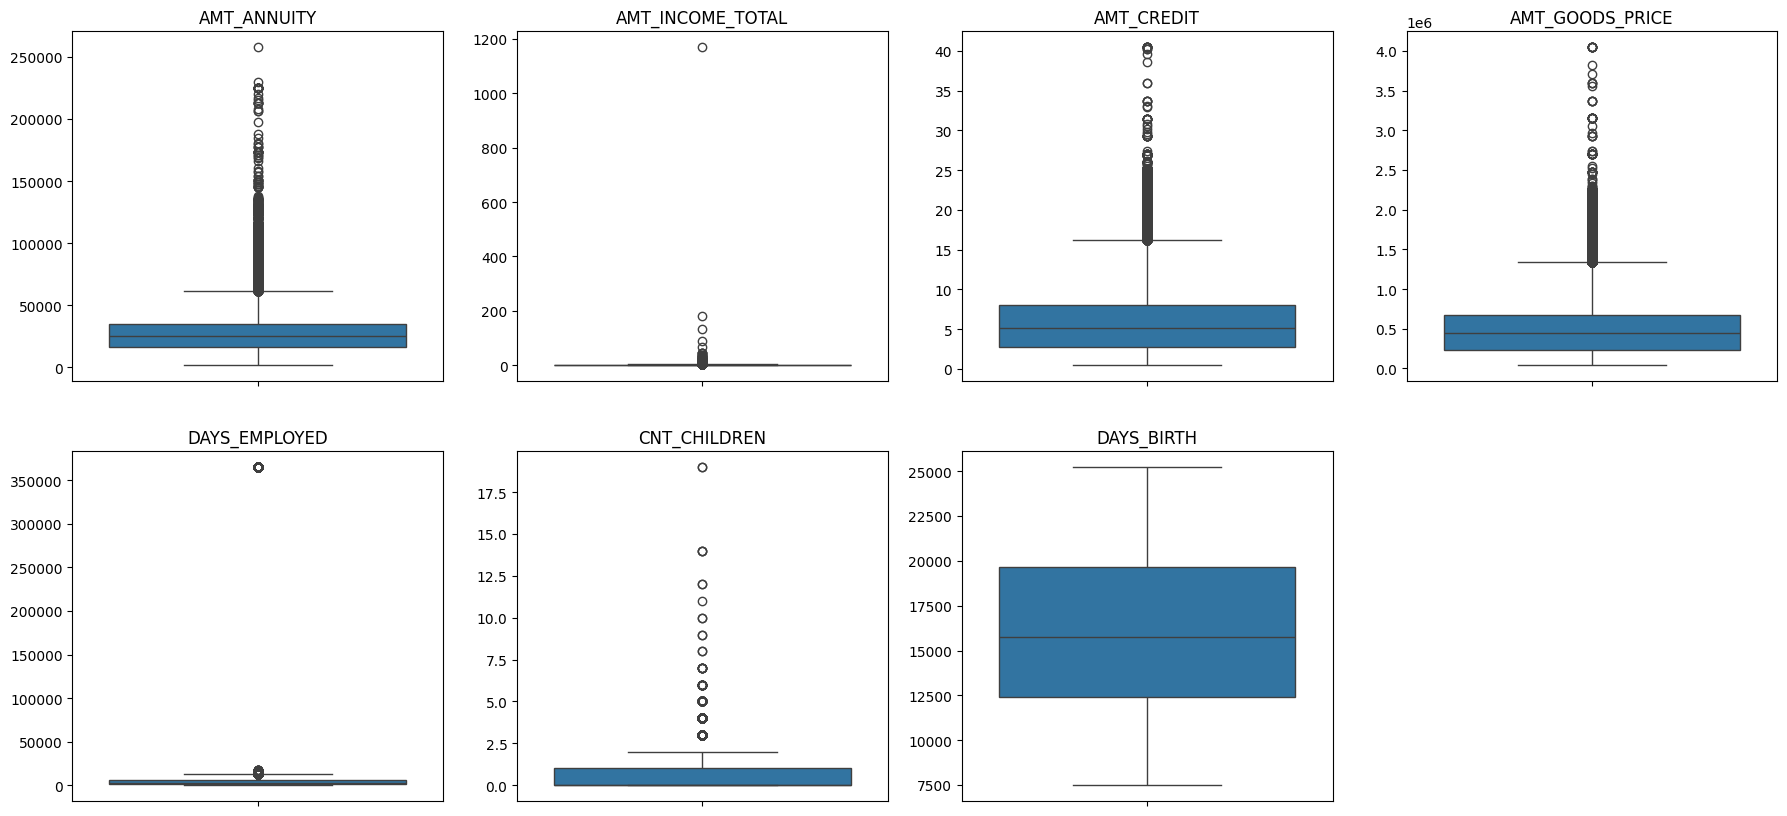

In [589]:
# for application dataset 

plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=Application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=Application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

The analysis of the current application data reveals the following observations:

- **AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, and CNT_CHILDREN**: These columns show some outliers, indicating variability in the corresponding values for loan applicants.
- **AMT_INCOME_TOTAL**: This column contains a significant number of outliers, suggesting that a few loan applicants have exceptionally high incomes compared to the majority.
- **DAYS_BIRTH**: This column has no outliers, indicating that the age-related data is consistent and reliable.
- **DAYS_EMPLOYED**: This column shows extreme outlier values, particularly around 350,000 days (approximately 958 years), which is unrealistic. This clearly indicates an incorrect data entry that needs to be addressed.

In [590]:
Application_df [['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,307511.000000,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979,5.990260,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231,4.024908,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


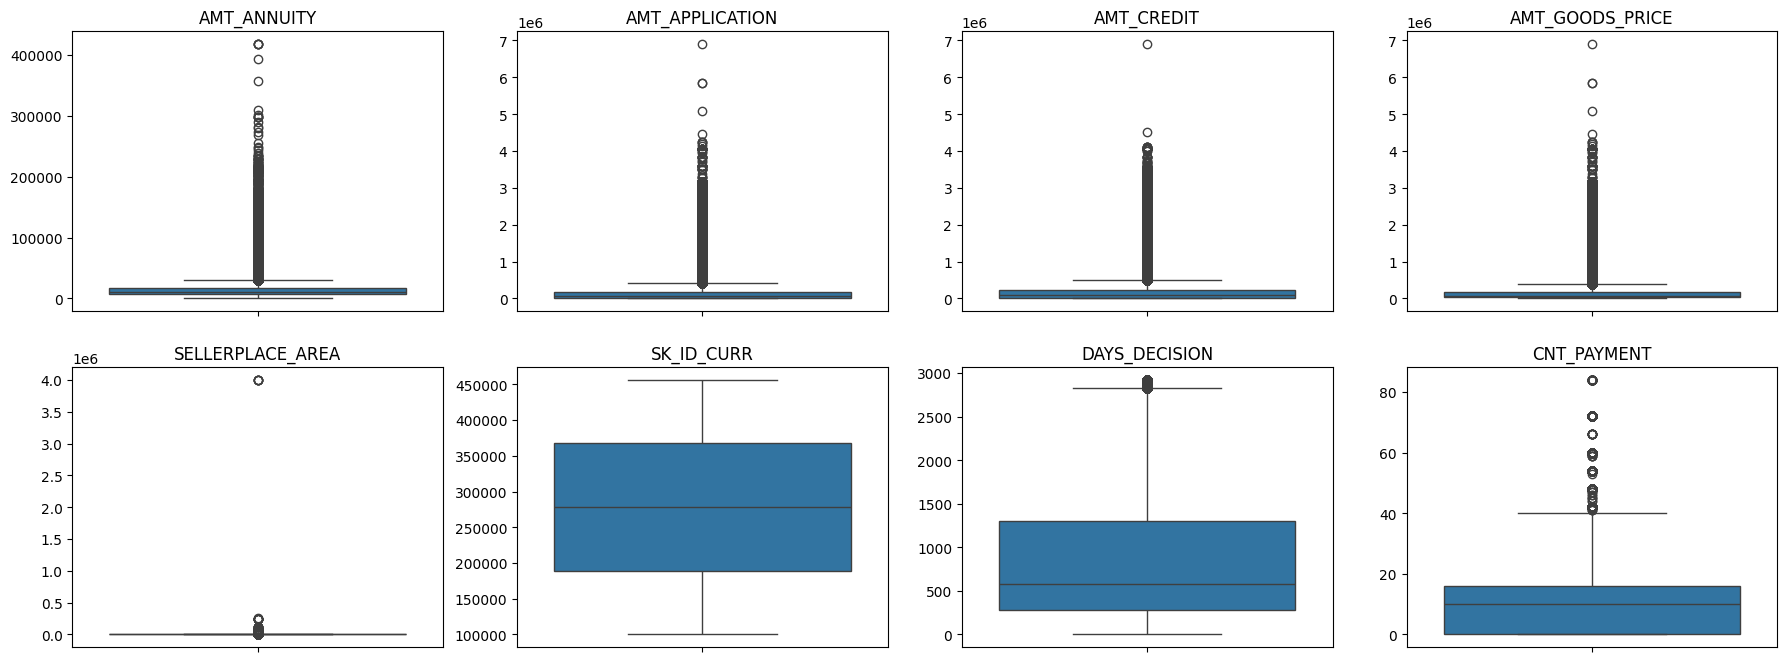

In [591]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=Previous_application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")
for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=Previous_application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

The analysis of the current application data reveals the following observations:

- **AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, and CNT_CHILDREN**: These columns show some outliers, indicating variability in the corresponding values for loan applicants.
- **AMT_INCOME_TOTAL**: This column contains a significant number of outliers, suggesting that a few loan applicants have exceptionally high incomes compared to the majority.
- **DAYS_BIRTH**: This column has no outliers, indicating that the age-related data is consistent and reliable.
- **DAYS_EMPLOYED**: This column shows extreme outlier values, particularly around 350,000 days (approximately 958 years), which is unrealistic. This clearly indicates an incorrect data entry that needs to be addressed.

In [592]:
Previous_application_df[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,3.139511e+02,1.247621e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.127443e+03,1.447588e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,-1.000000e+00,0.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,3.000000e+00,1.000000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


In [593]:
Application_df['TARGET'].value_counts().reset_index()

,TARGET,count
0,0,282686
1,1,24825


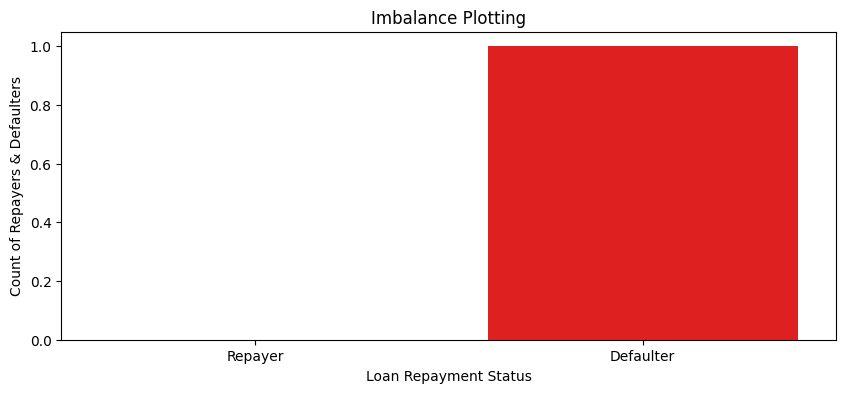

In [594]:
Imbalance = Application_df['TARGET'].value_counts().reset_index()

plt.figure(figsize = (10, 4))
x = ['Repayer','Defaulter']
sns.barplot(data = Imbalance, x = x, y = 'TARGET', palette = ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [595]:
count_0 = Imbalance.iloc[0]['TARGET']
count_1 = Imbalance.iloc[1]['TARGET']
count_0_perc = round(count_0 / (count_0 + count_1)* 100, 2)
count_1_perc = round(count_1 / (count_0 + count_1)* 100, 2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 0.00 and 100.00
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 0.00 : 1 (approx)


In [596]:

def uni_cat(feature, ylog=False, label_rotation=False, horizontal_layout=True):
    # Handle missing values before applying value_counts
    temp = Application_df[feature].dropna().value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = Application_df[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"] * 100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    # Set up subplots layout
    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 24))
        
    # 1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax=ax1, 
                     x=feature, 
                     data=Application_df,
                     hue="TARGET",
                     order=cat_perc[feature],
                     palette=["green", "red"])  # use color names

    # Set common styling
    ax1.set_title(feature, fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Blue'})
    ax1.legend(['Repayer', 'Defaulter'])

    # Apply log scale if ylog is True
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)", fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Blue'})   
    
    # Rotate labels if requested
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x=feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')

    # Rotate labels if requested
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    ax2.set_ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Blue'}) 

    # Display the plots
    plt.show()


In [626]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivar_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [598]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=Application_df, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [599]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [600]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])
    plt.legend(['Repayer','Defaulter'])

## Segmented Univriate Analysis

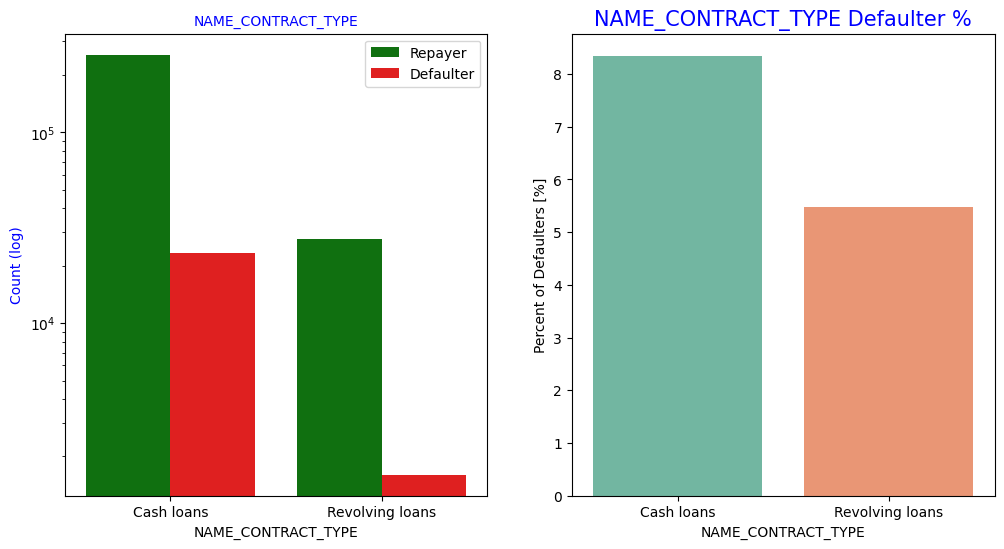

In [601]:
# Checking the contract type based on loan repayment status
uni_cat('NAME_CONTRACT_TYPE',True)

1. **Left Chart: Loan Distribution**
   - **Cash Loans** have significantly higher applicants (both repayers and defaulters) compared to **Revolving Loans**.
   - Repayers are more dominant in both categories, but Cash Loans also show a higher absolute number of defaulters.

2. **Right Chart: Default Rate Percentage**
   - Default rate is higher for Cash Loans (`~8%`) compared to Revolving Loans (`~5.5%`).
   - Cash Loans pose a higher risk of default despite their popularity.

**Insight:**  
Cash Loans are riskier for lenders due to their higher defaulter percentage and larger number of defaulters. Companies should implement stricter credit evaluations for Cash Loans to minimize risks.

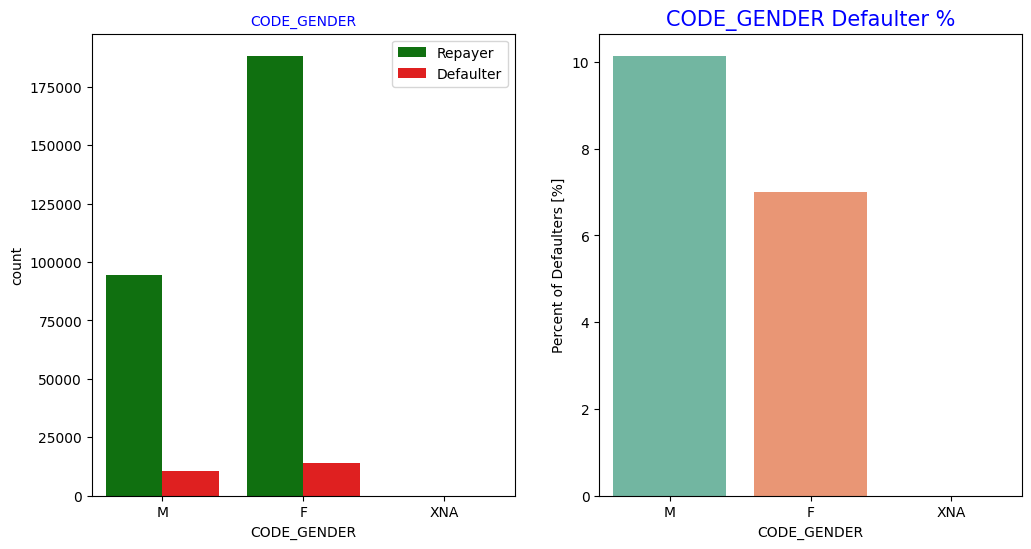

In [602]:
# Checking the type of Gender on loan repayment status
uni_cat('CODE_GENDER')

1. **Left Chart: Loan Distribution by Gender**  
   - Females (F) account for the largest share of loan applicants (both repayers and defaulters), followed by Males (M).  
   - The absolute number of defaulters is slightly higher for Females, but the difference is not significant.

2. **Right Chart: Default Rate Percentage**  
   - Male borrowers have a higher default rate (`~10%`) compared to Female borrowers (`~7%`).  
   - Gender marked as "XNA" shows negligible data, indicating it's not relevant for analysis.

**Insight:**  
Males are at a higher risk of defaulting despite their smaller representation among borrowers. Loan providers may consider gender-specific risk assessments when formulating lending policies.

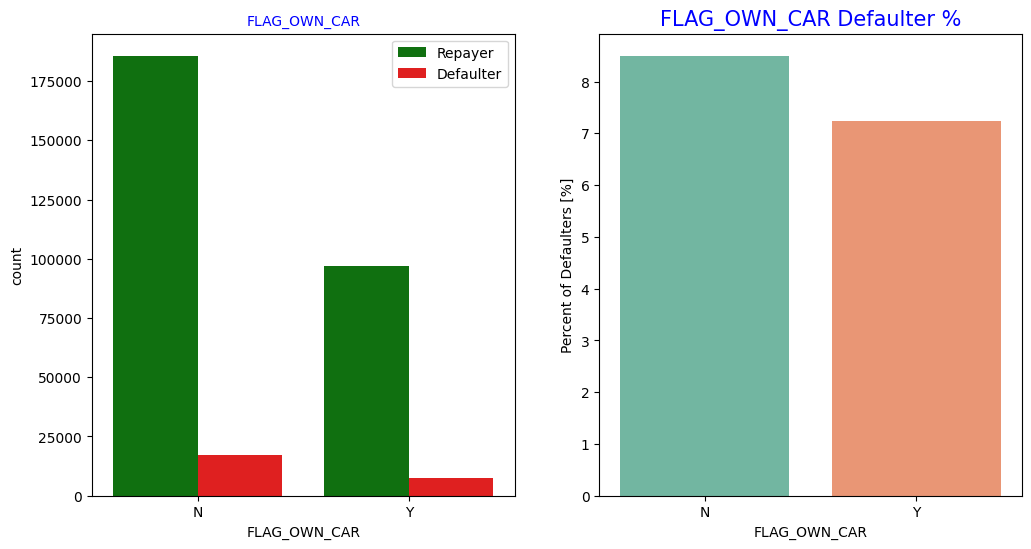

In [603]:
# Checking if owning a car is related to loan repayment status
uni_cat('FLAG_OWN_CAR')

1. **Left Chart: Loan Distribution by Car Ownership**  
   - Borrowers without a car (N) are the majority, both among repayers and defaulters.  
   - Borrowers with a car (Y) form a smaller proportion of the overall applicants, including defaulters.

2. **Right Chart: Default Rate Percentage**  
   - Default rate for borrowers without a car (`~8%`) is slightly higher than for those with a car (`~7%`).  

**Insight:**  
Car ownership seems to correlate with a slightly lower risk of default. Borrowers with cars may have better financial stability, which could be a useful factor for credit risk assessment.

Clients who own a car are half as many as those who do not. However, there appears to be no significant correlation between car ownership and loan repayment, as the default percentages are nearly identical in both cases.

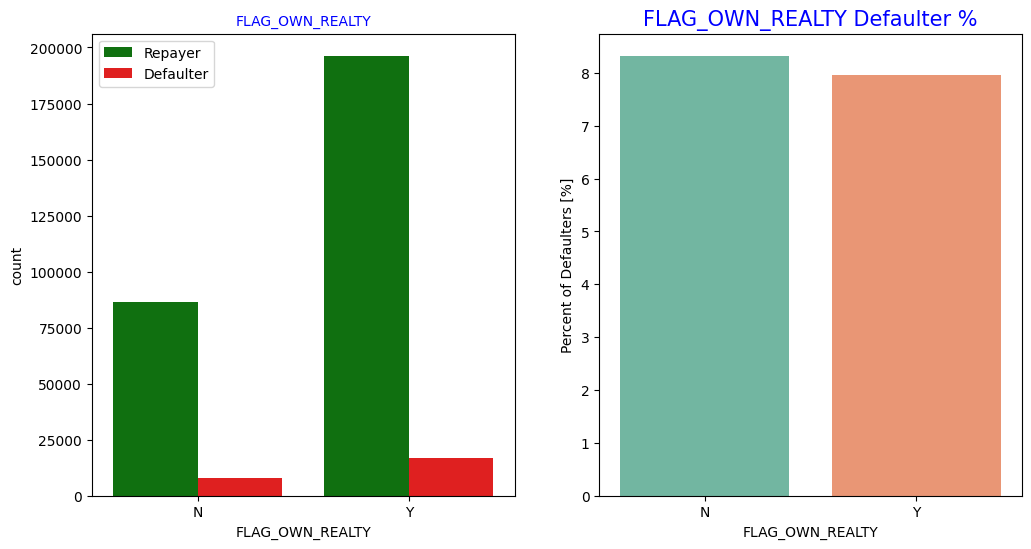

In [604]:
# Checking if owning a realty is related to loan repayment status
uni_cat('FLAG_OWN_REALTY')

1. **Left Chart:** The majority of applicants own real estate (`Y`). Repayers significantly outnumber defaulters in both groups (`Y` and `N`).
2. **Right Chart:** The percentage of defaulters is slightly higher for non-homeowners (`N`) compared to homeowners (`Y`).

### Insight:
Homeownership correlates with a slightly lower default rate, suggesting that owning real estate might be associated with better financial stability and repayment capacity. However, the overall difference in default rates is not substantial.

Clients who own real estate are more than twice the number of those who don’t. However, the default rate for both categories is approximately the same (8%), indicating no correlation between real estate ownership and loan default.

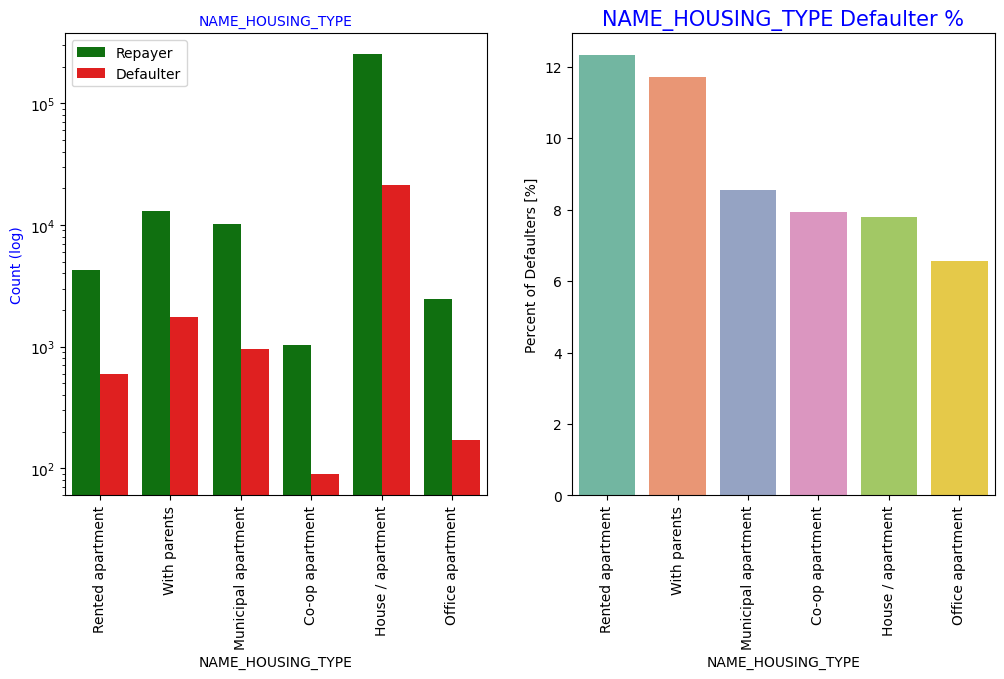

In [605]:
# Analyzing Housing Type based on loan repayment status
uni_cat("NAME_HOUSING_TYPE",True,True,True)

The analysis of housing types reveals significant variations in repayment behavior. Applicants living in houses or apartments constitute the largest group, followed by those living with parents and in municipal apartments. Defaulters are present across all housing categories, but the proportions vary. The default rate is highest among individuals residing in rented apartments and with parents, which may indicate financial instability or lower income levels. On the other hand, lower default rates are observed for those living in houses, apartments, and office apartments, suggesting better financial security and stability in these groups.

**The majority of people live in houses or apartments. Those residing in office apartments have the lowest default rate. In contrast, individuals living with parents (11.5%) or in rented apartments (over 12%) have a higher likelihood of defaulting.**

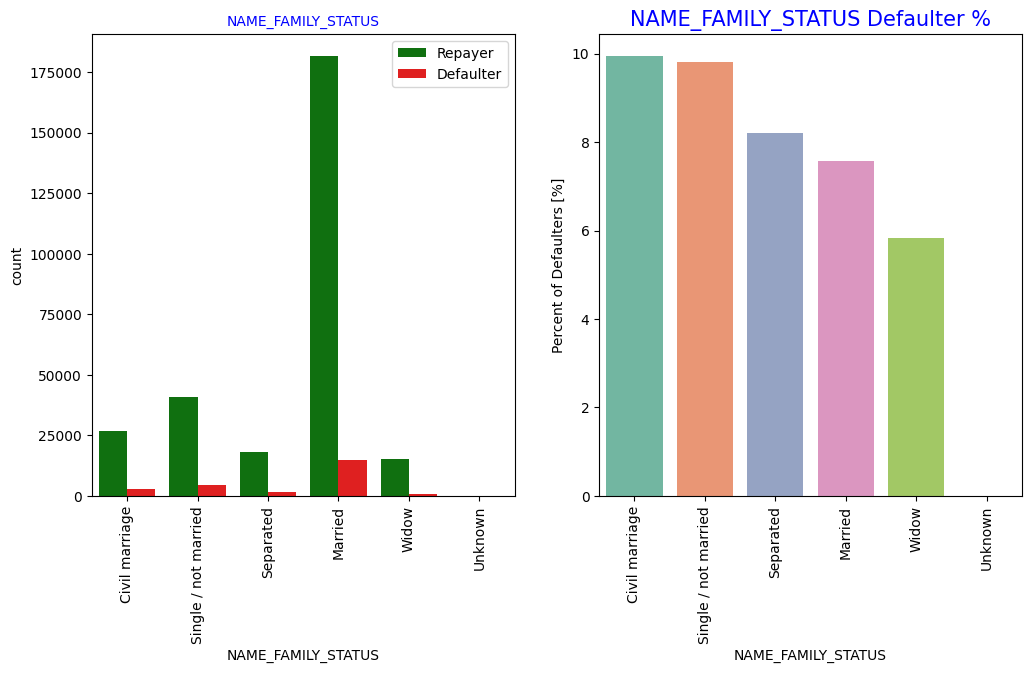

In [606]:
# Analyzing Family status based on loan repayment status
uni_cat("NAME_FAMILY_STATUS",False,True,True)

Married individuals make up the largest group of applicants and have a lower default rate compared to other family statuses. The highest default rates are seen among those in civil marriages and single/not married individuals. Widows have the lowest default rate, suggesting better financial stability. Overall, being married or widowed appears to be linked with lower chances of default.



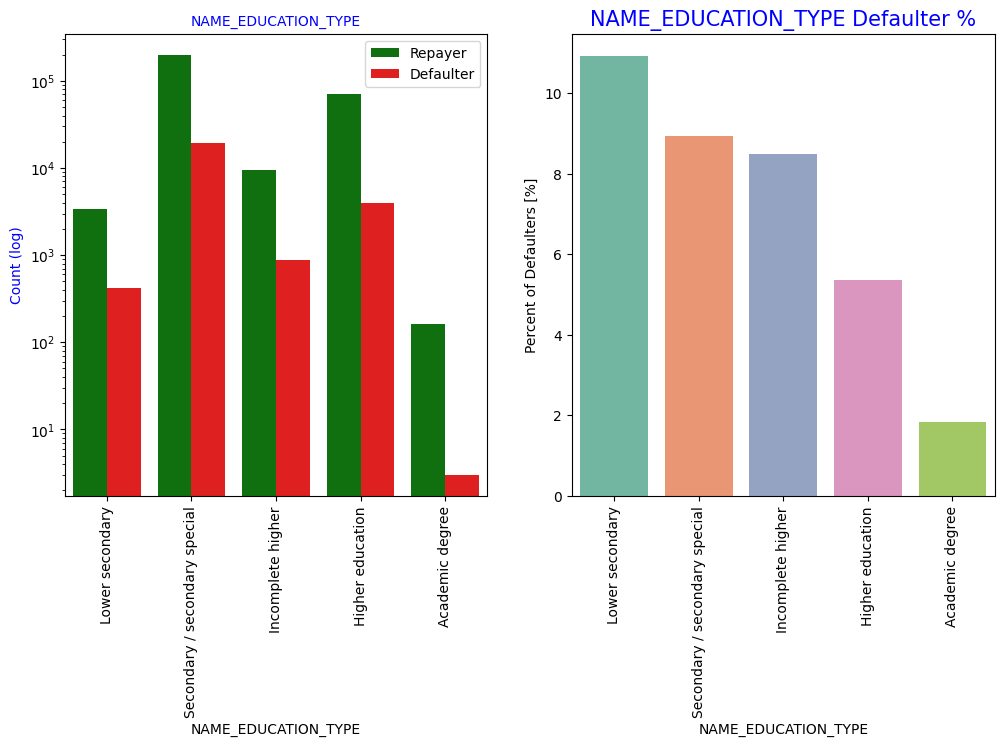

In [607]:
# Analyzing Education Type based on loan repayment status
uni_cat("NAME_EDUCATION_TYPE",True,True,True)

**Most clients have secondary or secondary special education, followed by those with higher education, while very few hold an academic degree. The default rate is highest among those with lower secondary education (11%), while clients with an academic degree have the lowest default rate, below 2%.**

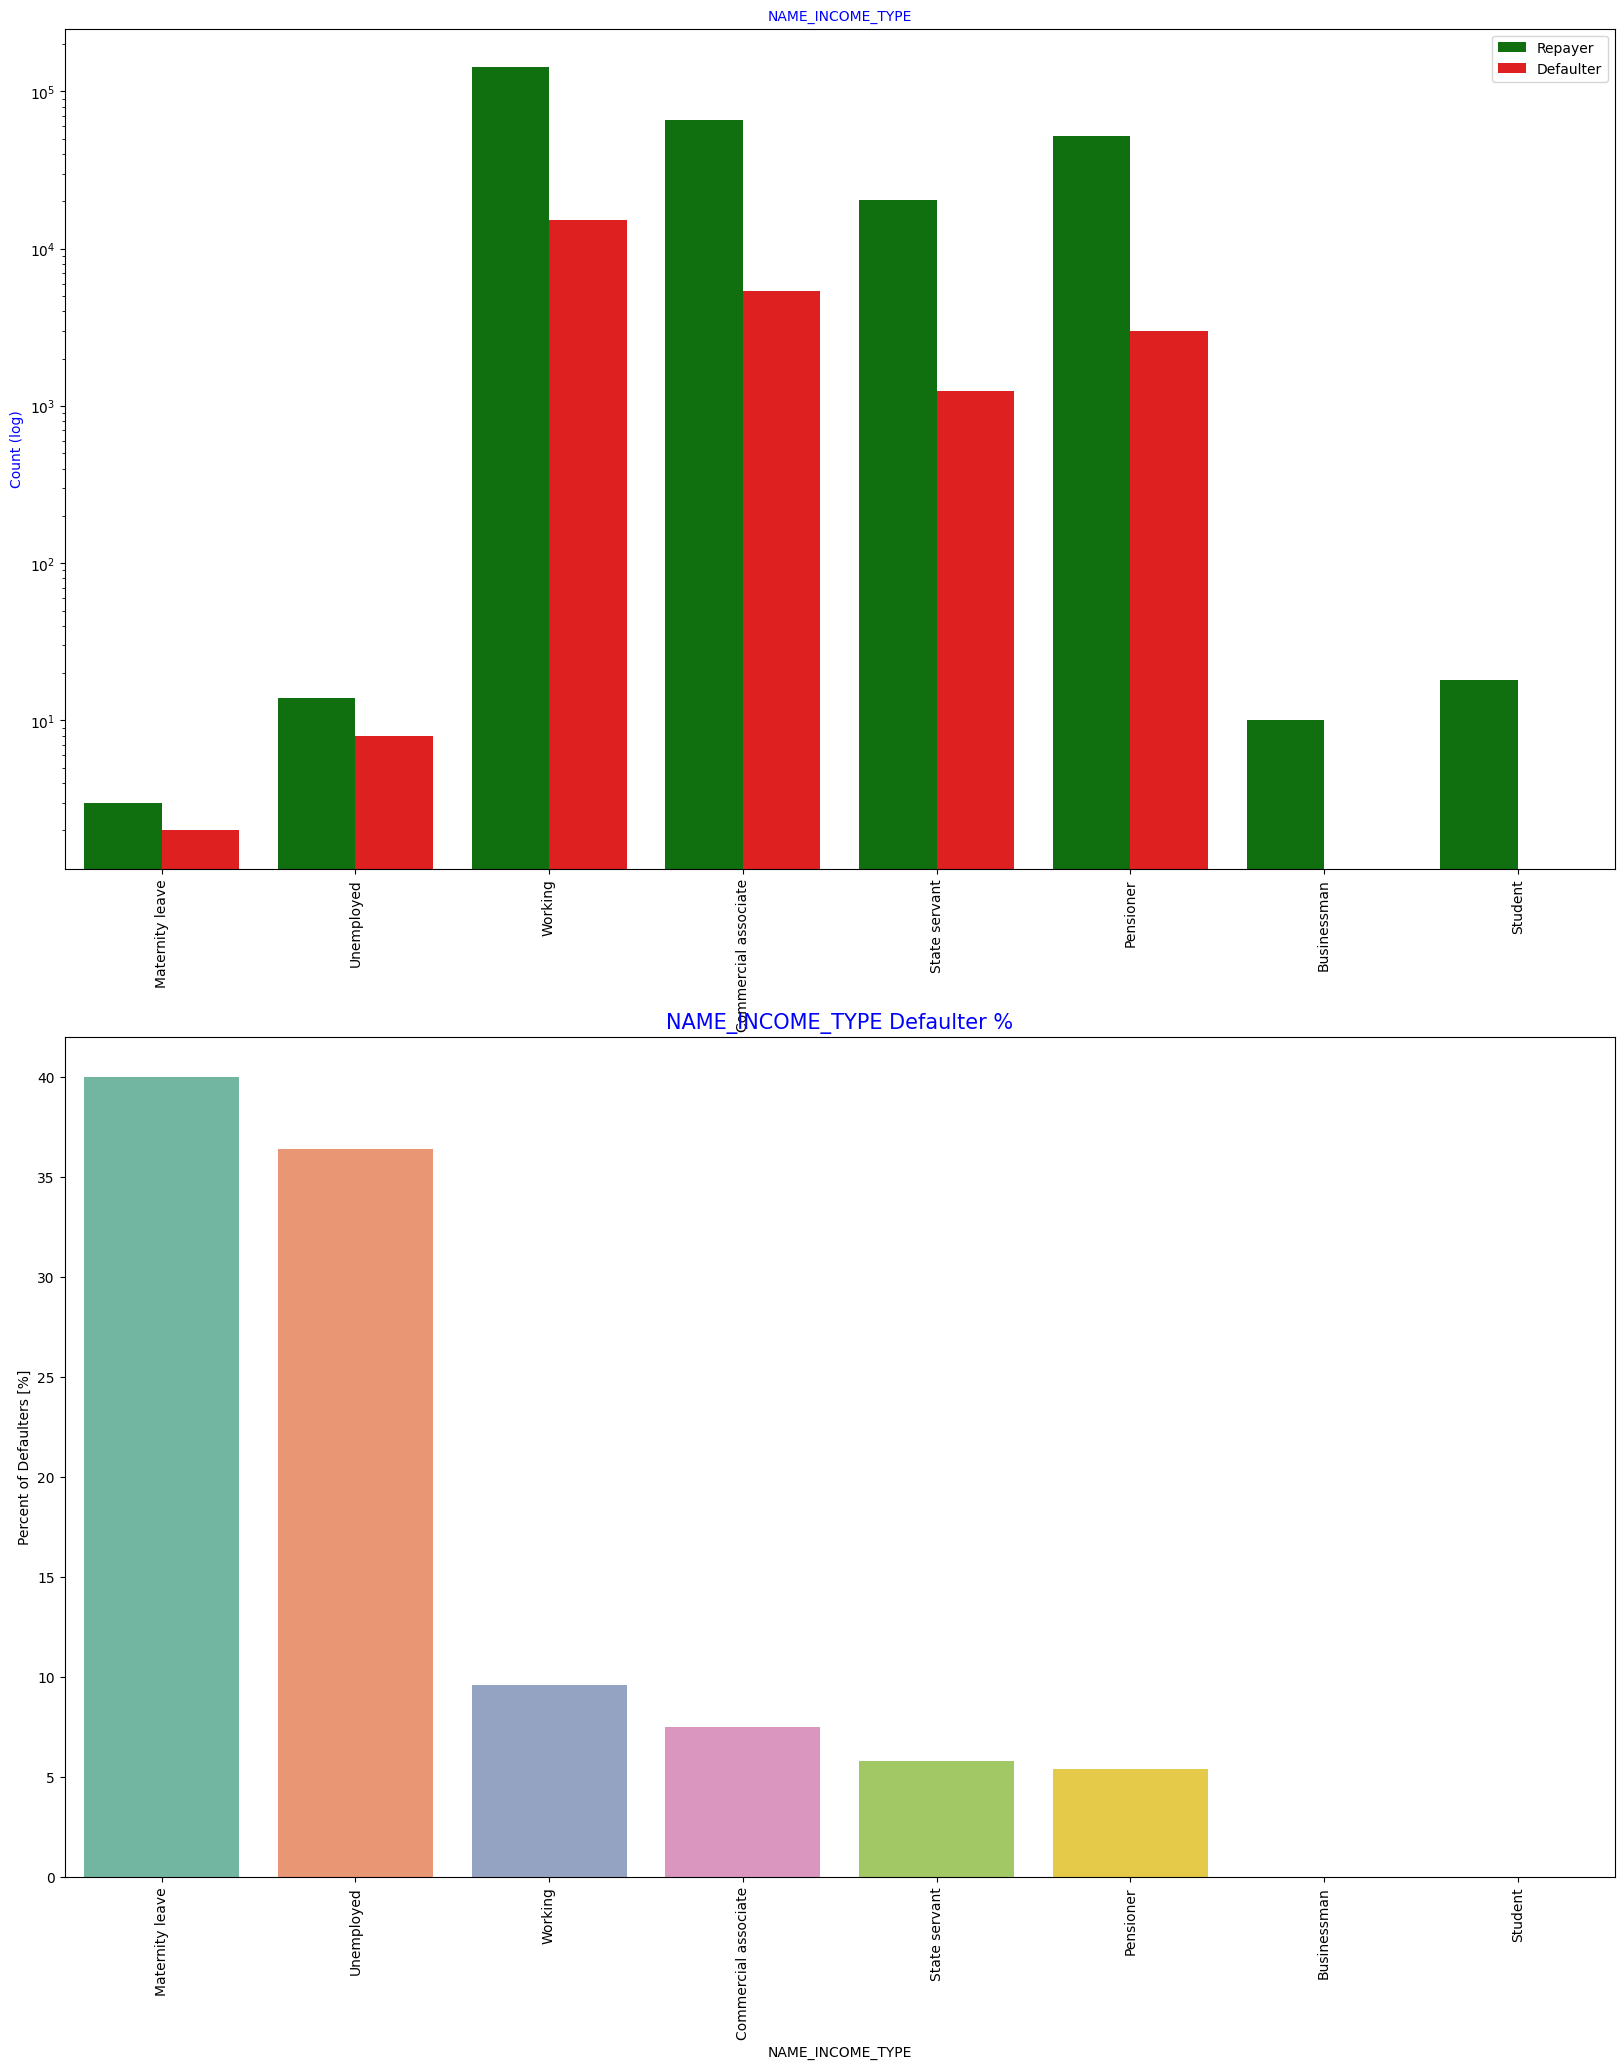

In [608]:
# Analyzing Income Type based on loan repayment status
uni_cat("NAME_INCOME_TYPE",True,True,False)

The majority of loan applicants belong to the "Working" income type, followed by "Commercial Associate," "Pensioner," and "State Servant."  

Applicants on "Maternity Leave" have the highest loan default rate, nearing 40%, followed by "Unemployed" applicants at 37%. All other income types have default rates below 10%.  

Notably, "Students" and "Businessmen," although fewer in number, have no recorded defaults, making these two categories the safest for loan approvals.

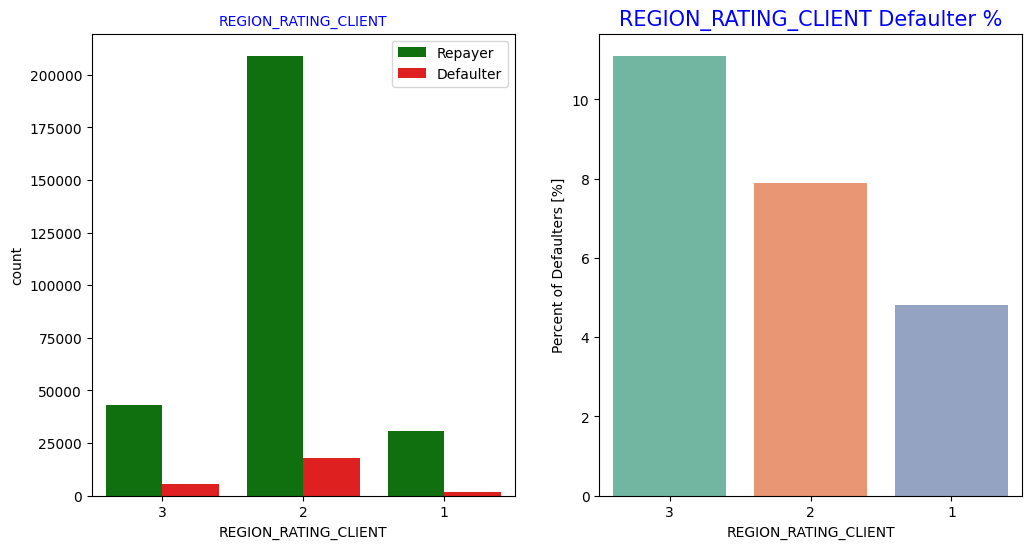

In [609]:
# Analyzing Region rating where applicant lives based on loan repayment status
uni_cat("REGION_RATING_CLIENT",False,False,True)

The majority of loan applicants reside in Region_Rating 2 areas.  

Region_Rating 3 has the highest default rate at 11%, while applicants living in Region_Rating 1 have the lowest probability of defaulting, making them the safest group for loan approvals.

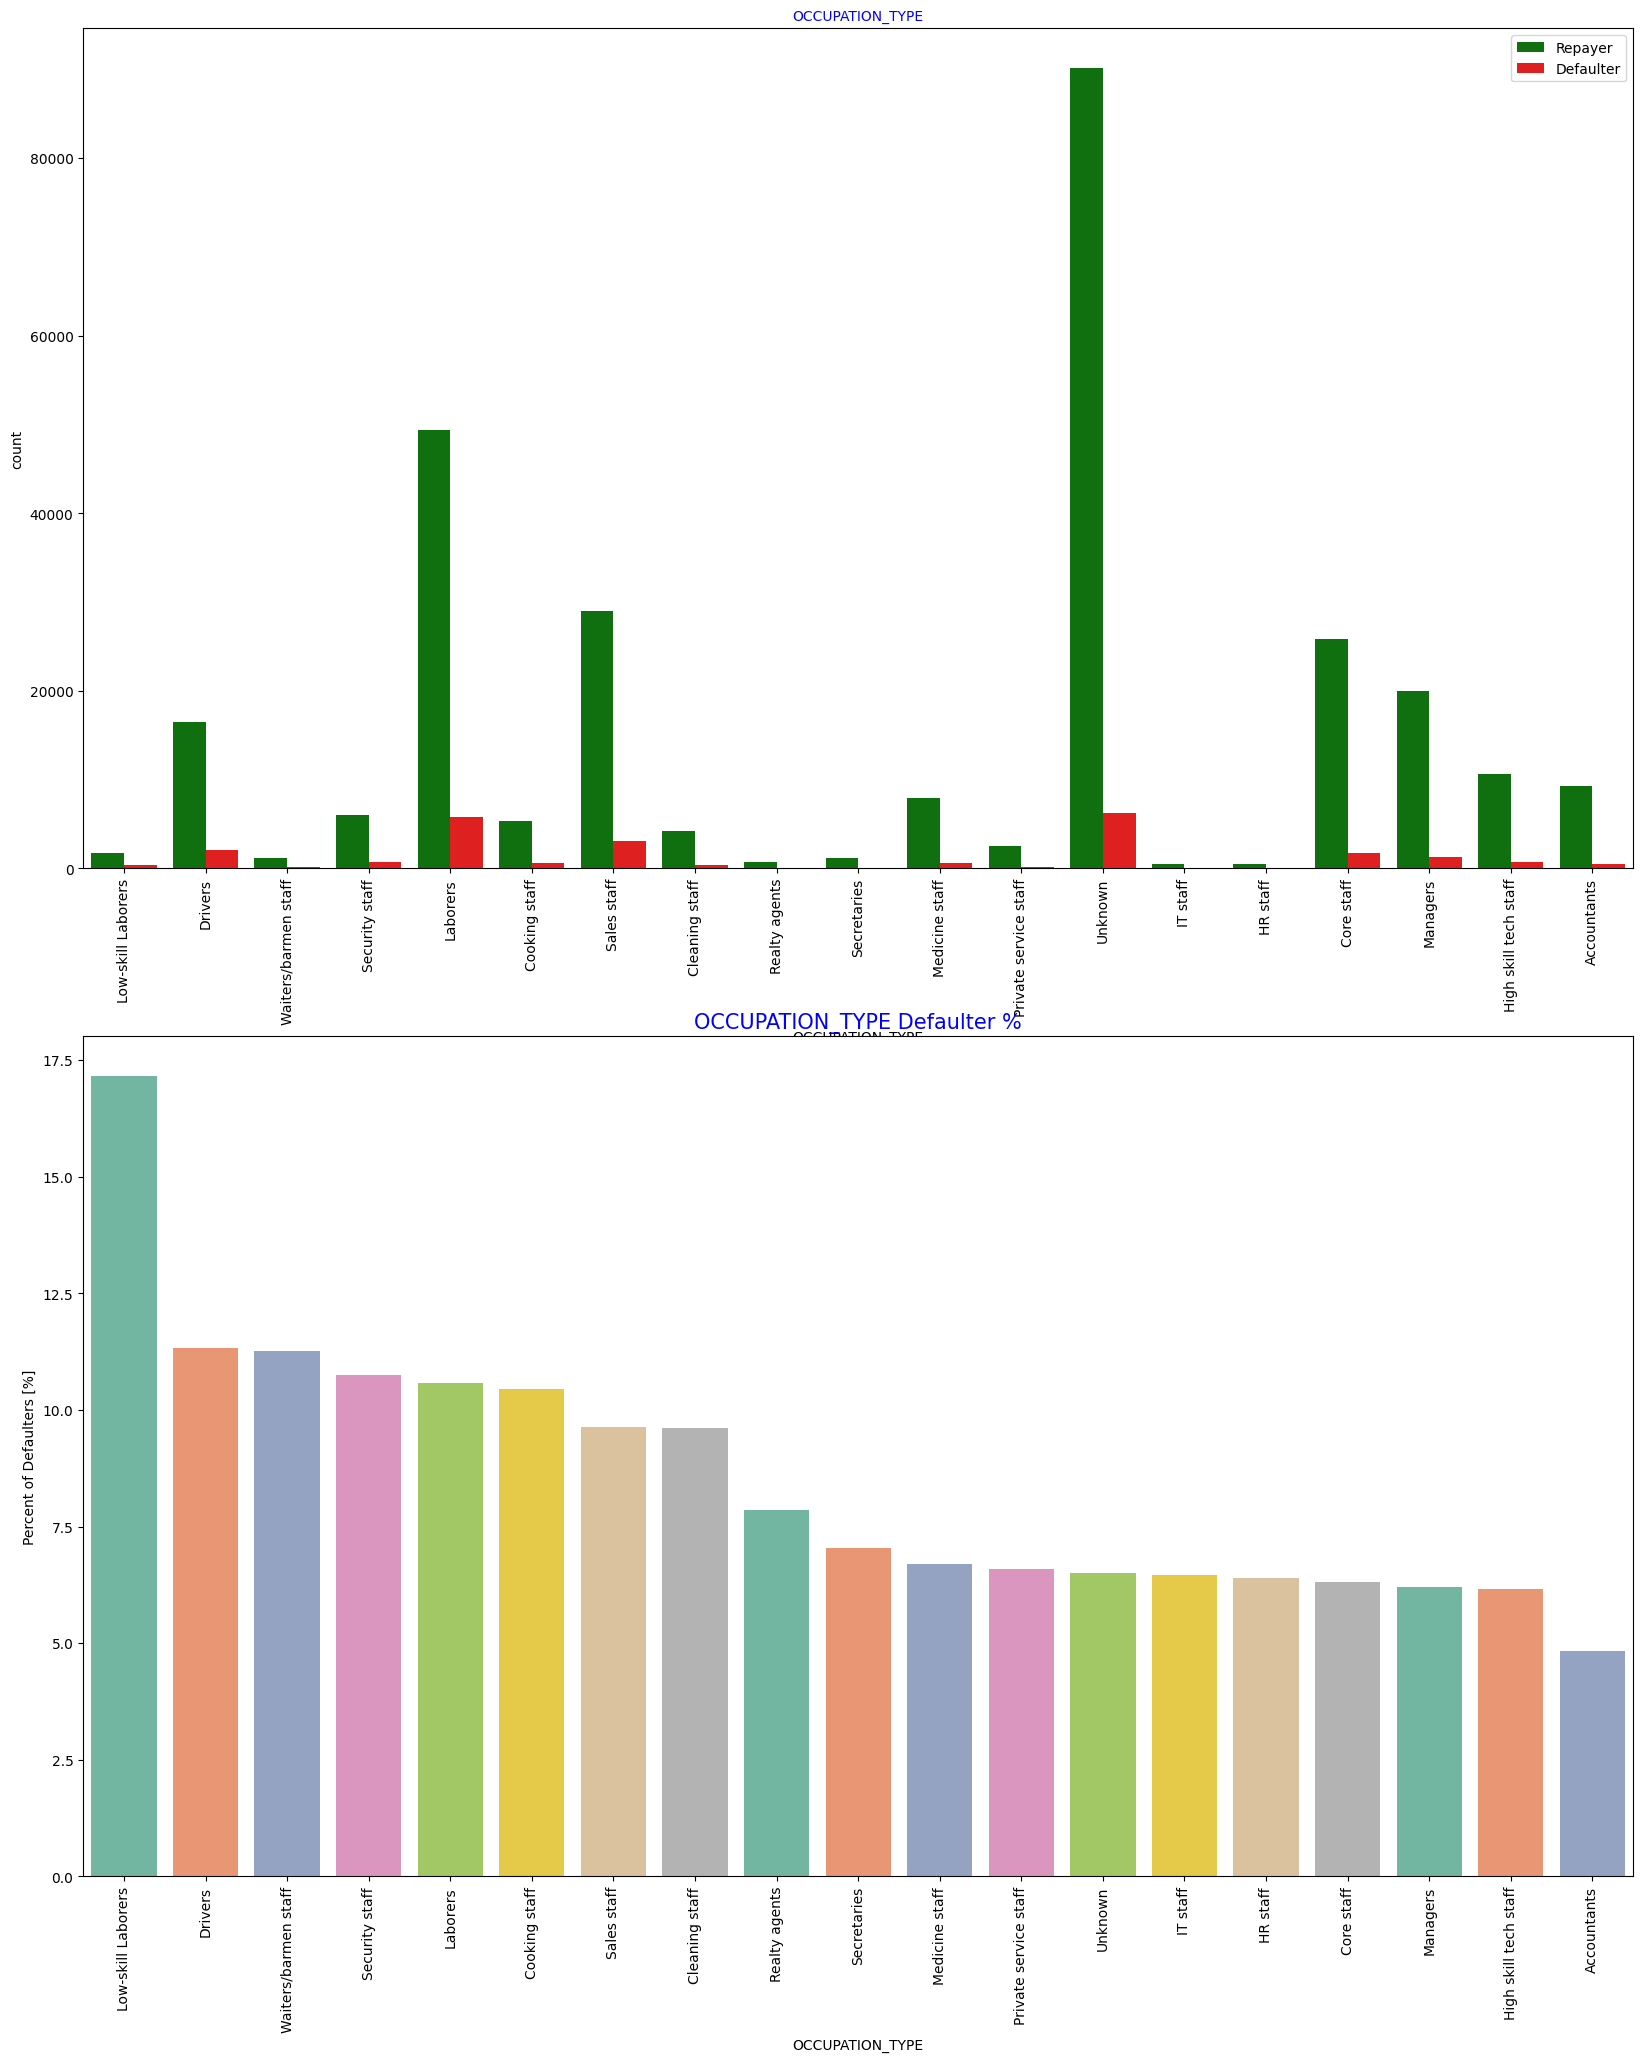

In [610]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
uni_cat("OCCUPATION_TYPE",False,True,False)

The majority of loans are taken by Laborers, followed by Sales staff, while IT staff take the fewest loans.  

The category with the highest percentage of unpaid loans is "Low-skill Laborers" (above 17%), followed by "Drivers," "Waiters/Barmen Staff," "Security Staff," "Laborers," and "Cooking Staff."

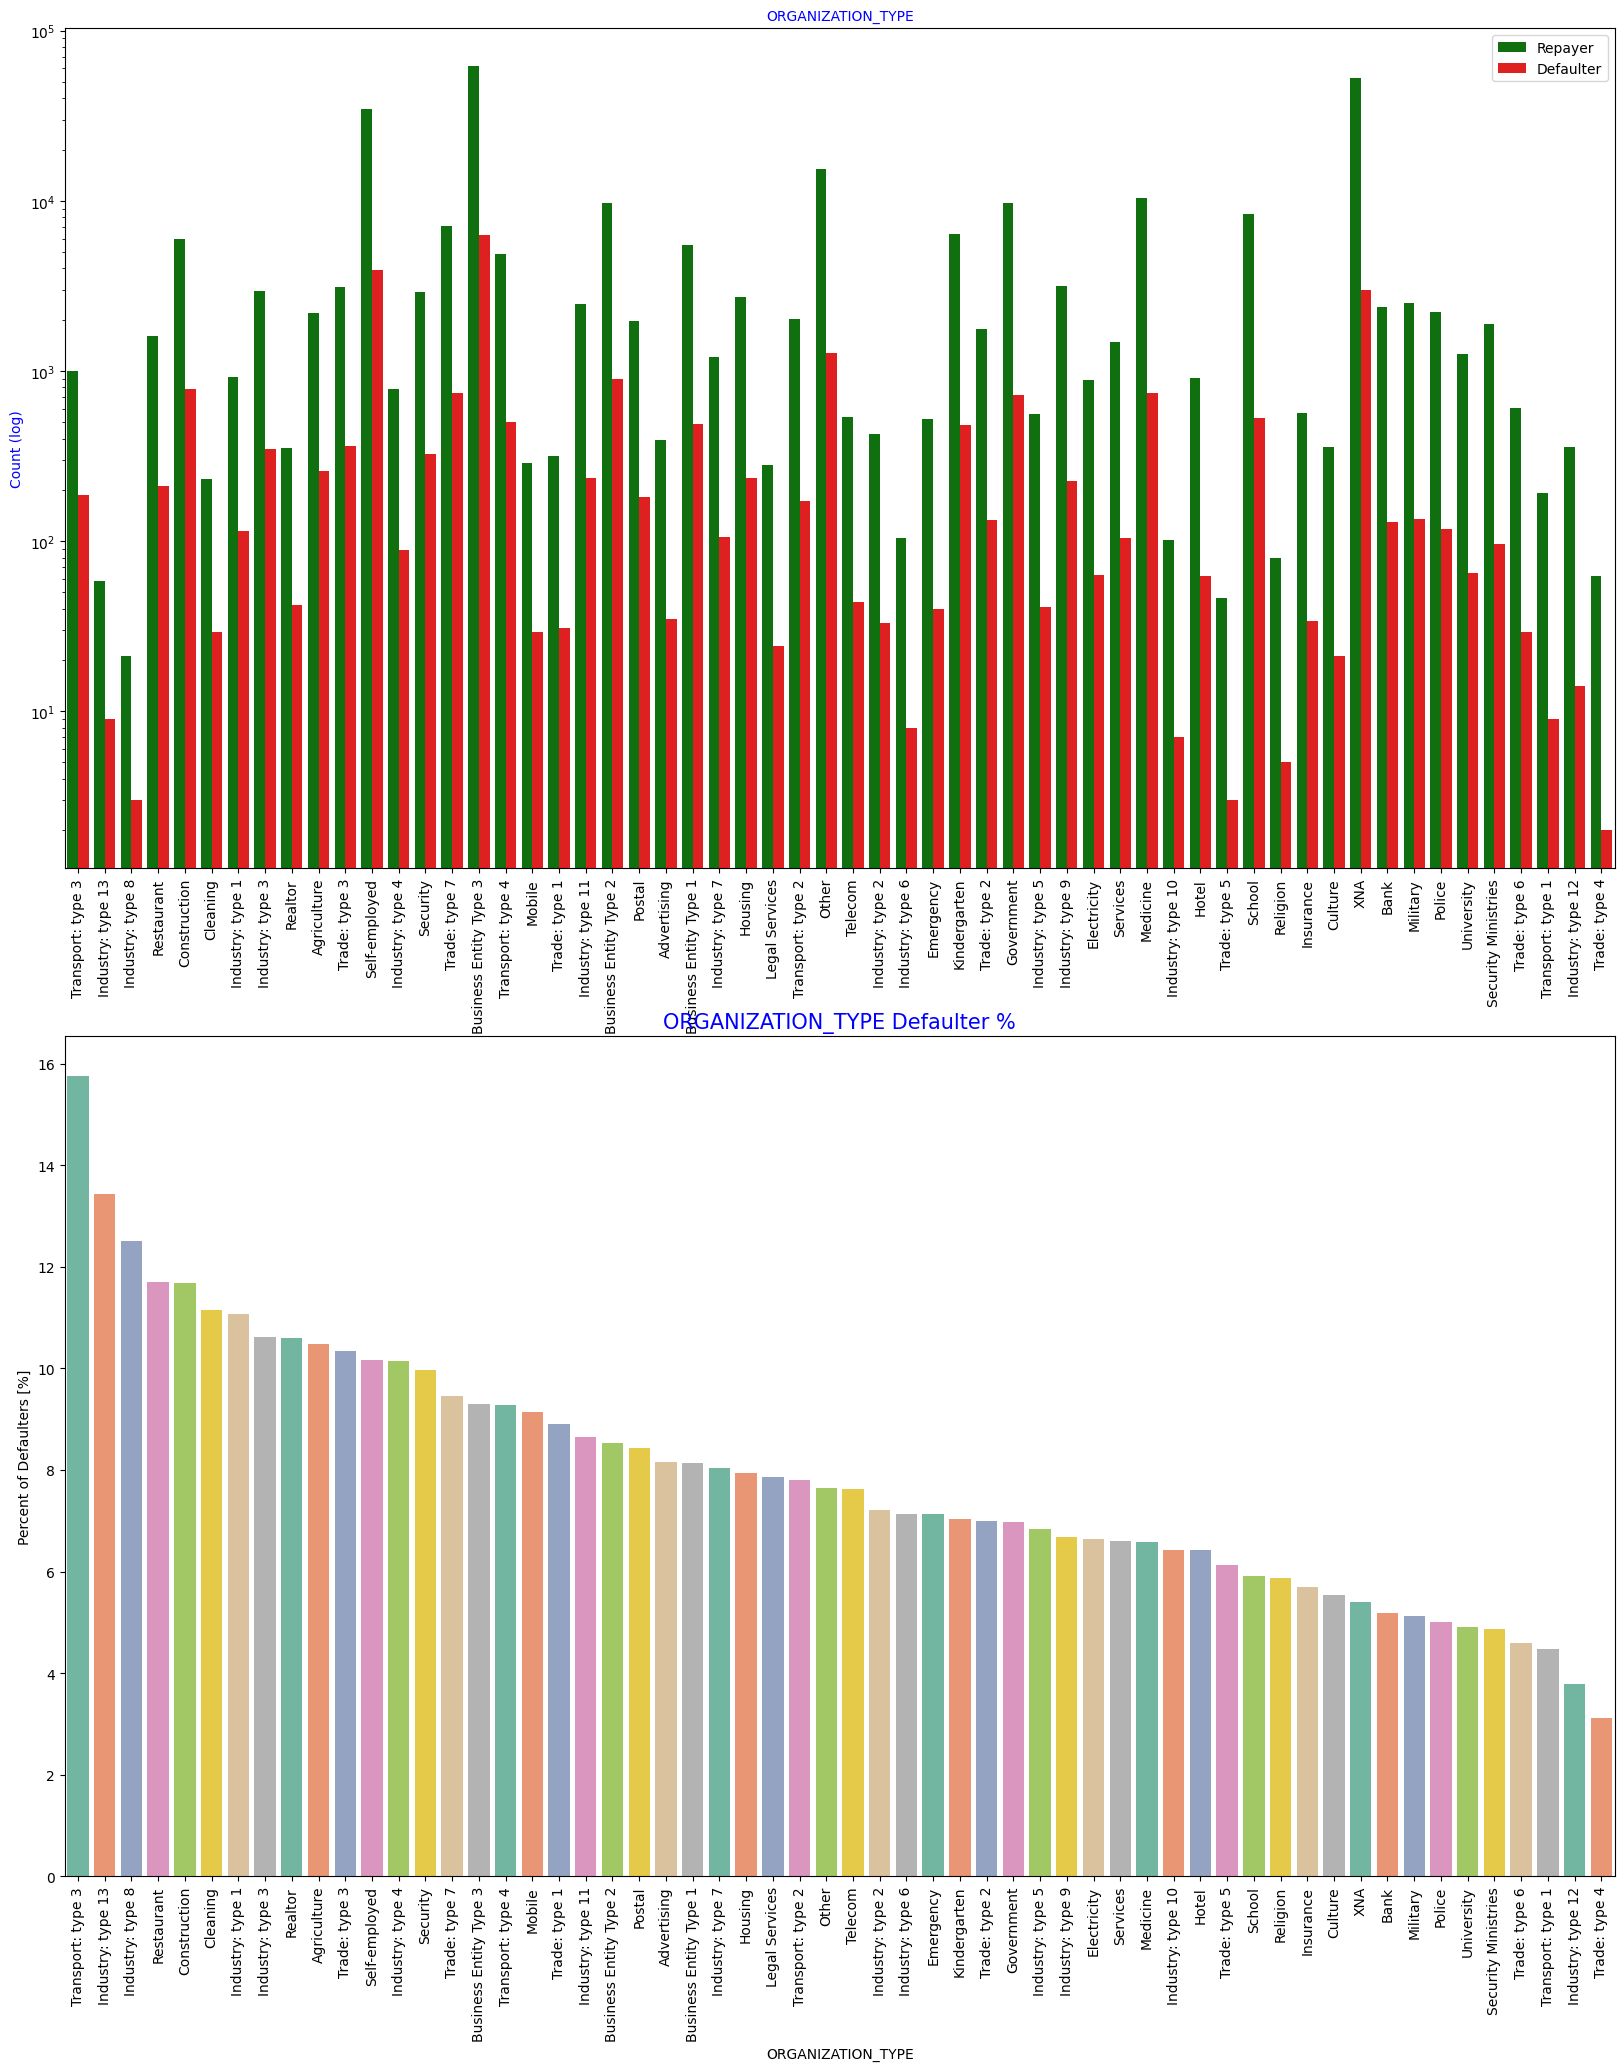

In [611]:
# Checking Loan repayment status based on Organization type
uni_cat("ORGANIZATION_TYPE",True,True,False)

Organizations with the highest percentage of unpaid loans include:

- Transport: Type 3 (16%)
- Industry: Type 13 (13.5%)
- Industry: Type 8 (12.5%)
- Restaurant (less than 12%)

Self-employed individuals have a relatively high default rate and should either be avoided for loan approval or offered loans with a higher interest rate to mitigate the default risk.

Most loan applications come from Business Entity Type 3, and for a significant number of applications, the organization type information is unavailable (XNA).

The following organization categories have lower default rates, making them safer for loan approvals:

- Trade Type 4 and 5
- Industry Type 8

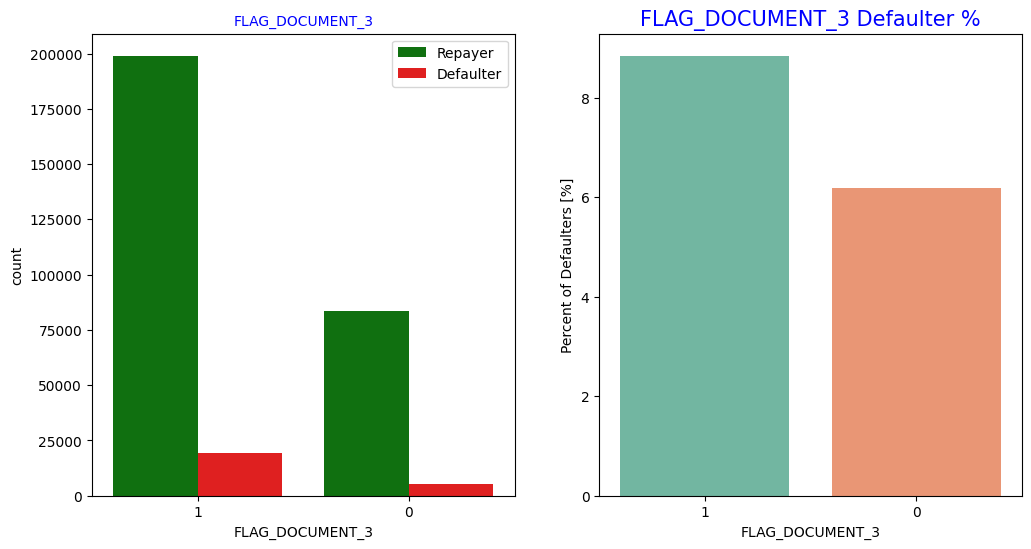

In [612]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
uni_cat("FLAG_DOCUMENT_3",False,False,True)

The majority of clients have the `FLAG_DOCUMENT_3` attribute marked as `1` (present), with a smaller group having it marked as `0` (absent). The default rate is higher among those with `FLAG_DOCUMENT_3` marked as `1` compared to those with it marked as `0`. This indicates that having this document present does not correlate with lower default risk and, in fact, shows a higher likelihood of defaulting.

There is no strong link between submitting document 3 and loan repayment. Even when applicants submitted the document, the default rate was slightly higher (9%) compared to those who did not submit it (6%).

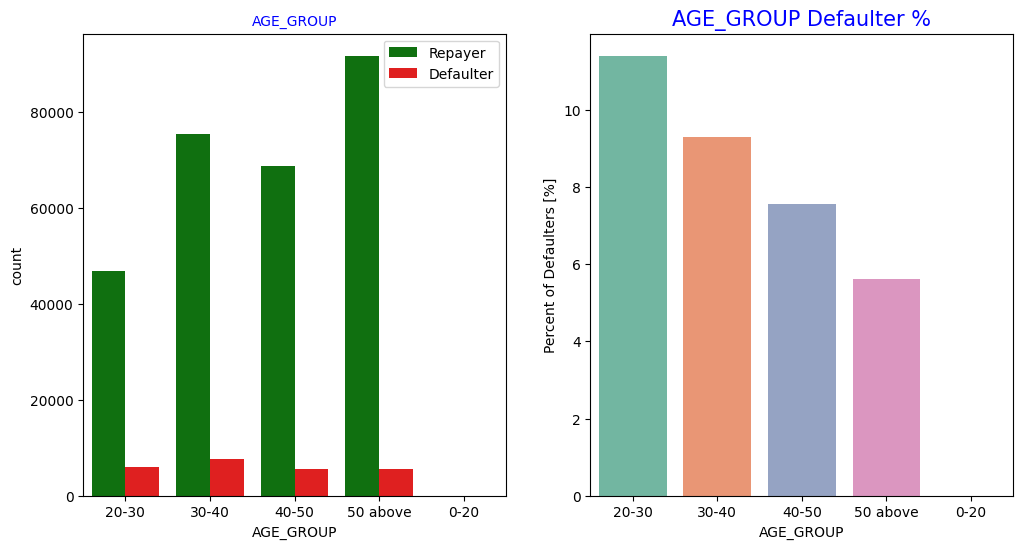

In [613]:
# Analyzing Age Group based on loan repayment status
uni_cat("AGE_GROUP",False,False,True)

People in the age group range 20-40 have higher probability of defaulting

People above age of 50 have low probability of defailting

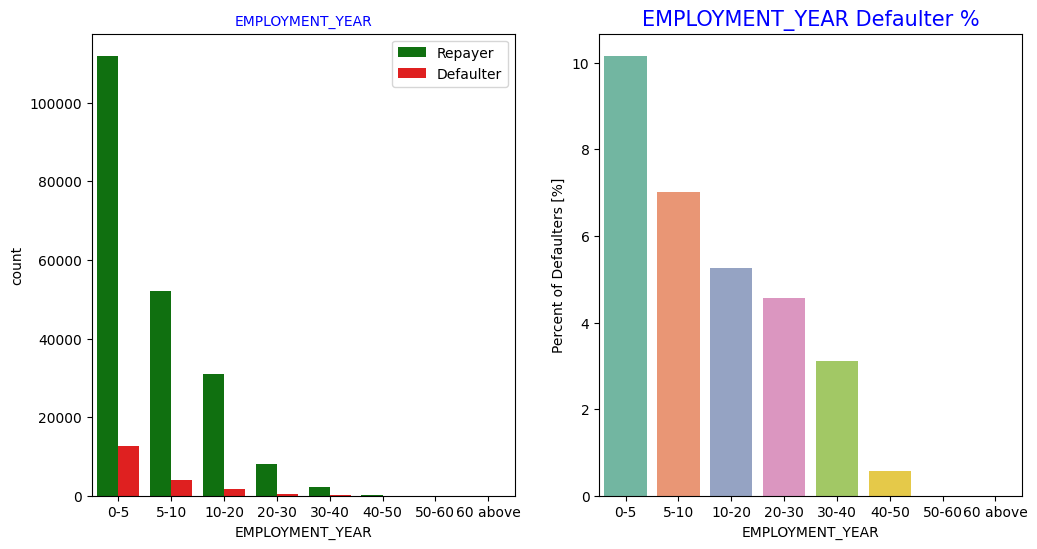

In [614]:
# Analyzing Employment_Year based on loan repayment status
uni_cat("EMPLOYMENT_YEAR",False,False,True)

Most applicants have 0–5 years of work experience, with this group showing the highest default rate at 10%. As work experience increases, the default rate steadily declines, dropping to less than 1% for individuals with over 40 years of experience.

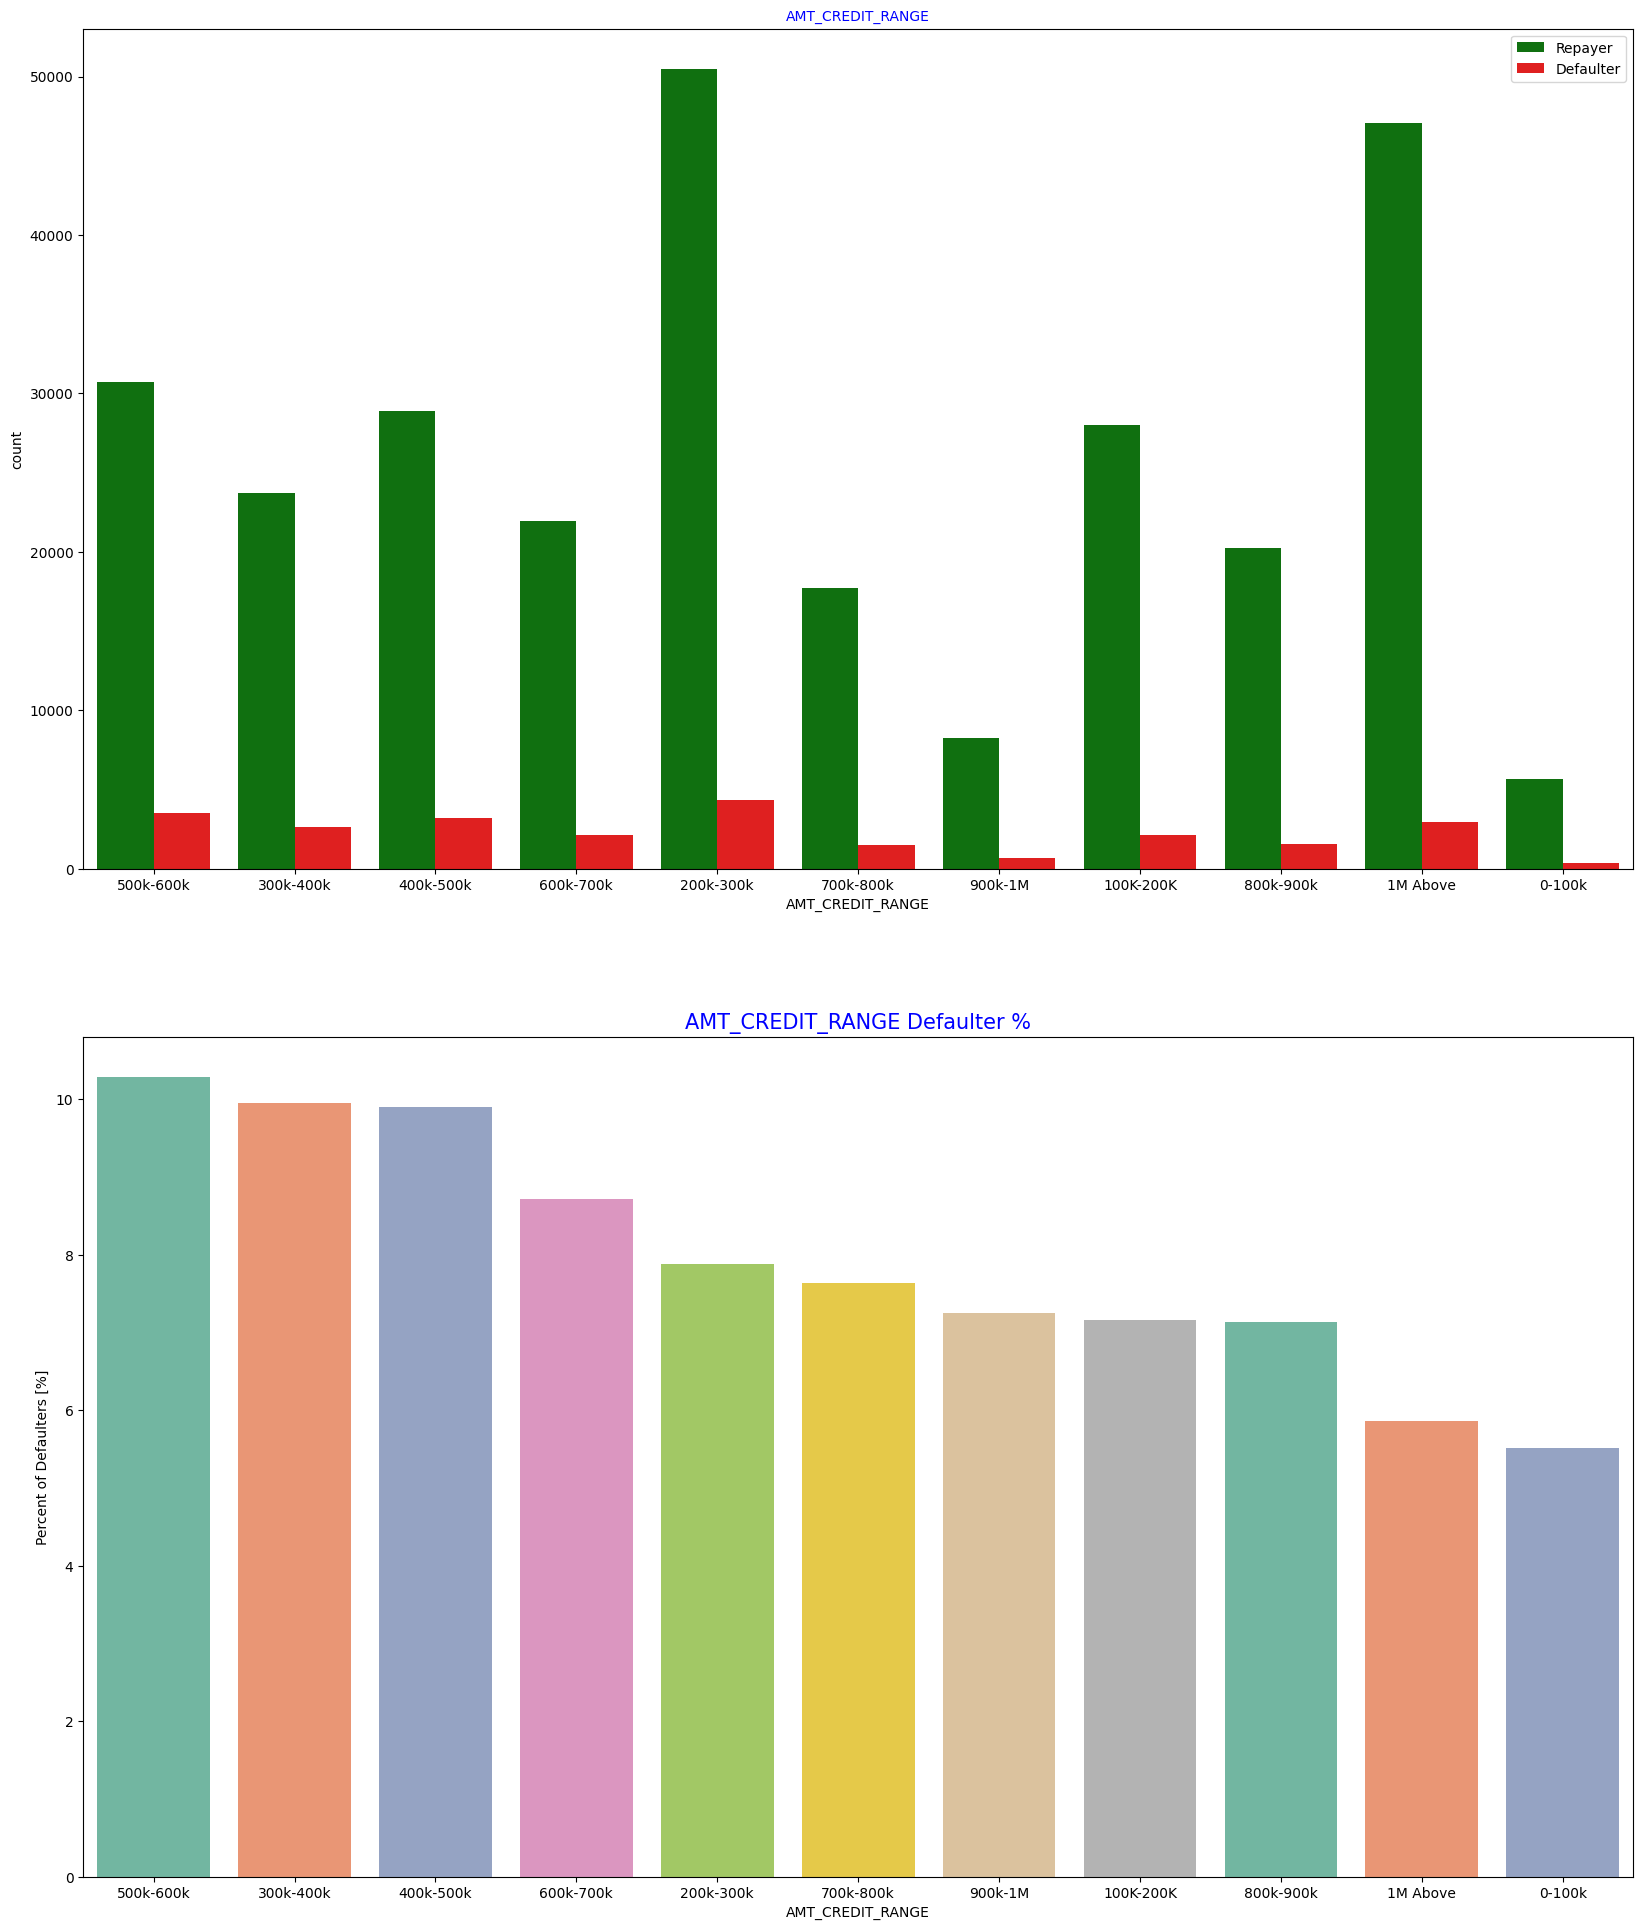

In [615]:
# Analyzing Amount_Credit based on loan repayment status
uni_cat("AMT_CREDIT_RANGE",False,False,False)

More than 80% of the loan provided are for amount less than 900,000
People who get loan for 300-600k tend to default more than others.

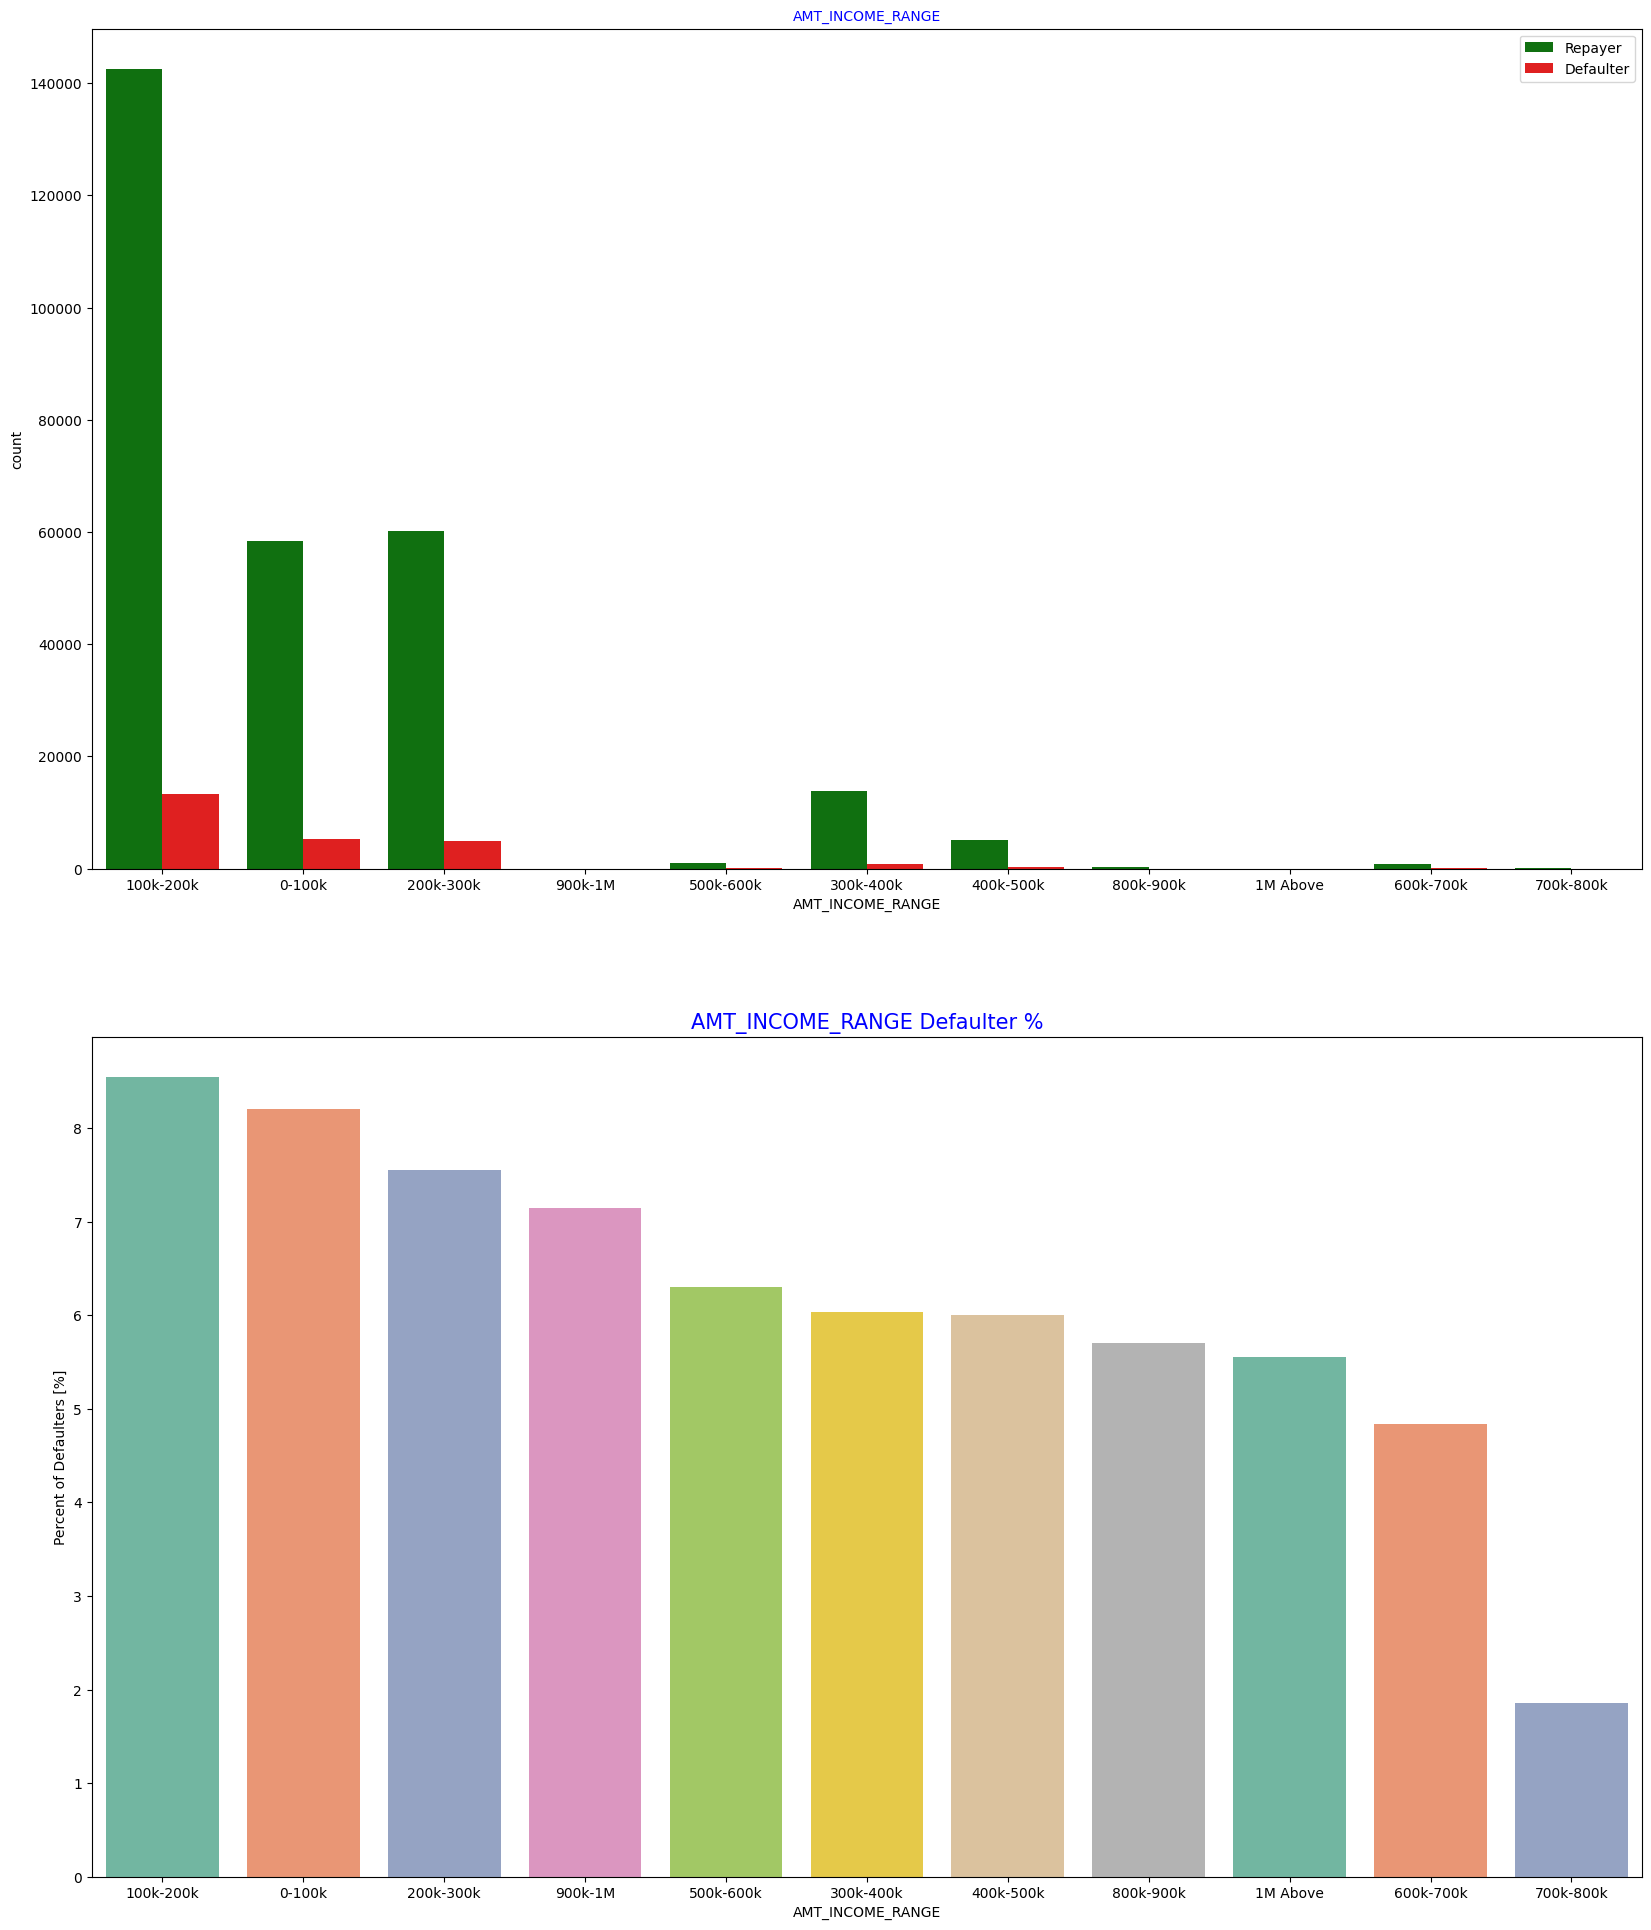

In [616]:
# Analyzing Amount_Income Range based on loan repayment status
uni_cat("AMT_INCOME_RANGE",False,False,False)

90% of the applicants have a total income of less than ₹300,000. Applications with an income below ₹300,000 show a high probability of defaulting, while applicants with an income exceeding ₹700,000 are less likely to default.

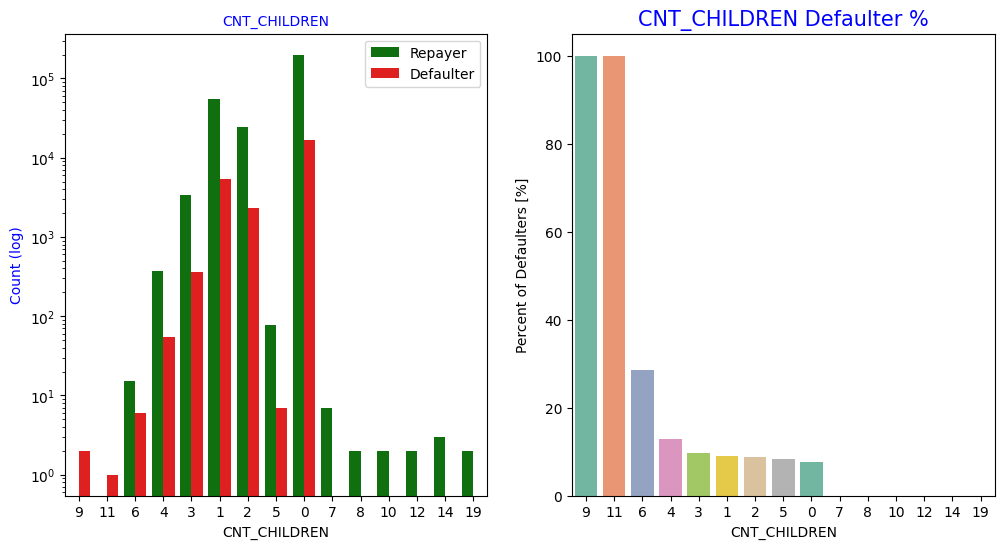

In [617]:
# Analyzing Number of children based on loan repayment status
uni_cat("CNT_CHILDREN",True)

Most of the applicants do not have children

Very few clients have more than 3 children.

Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate

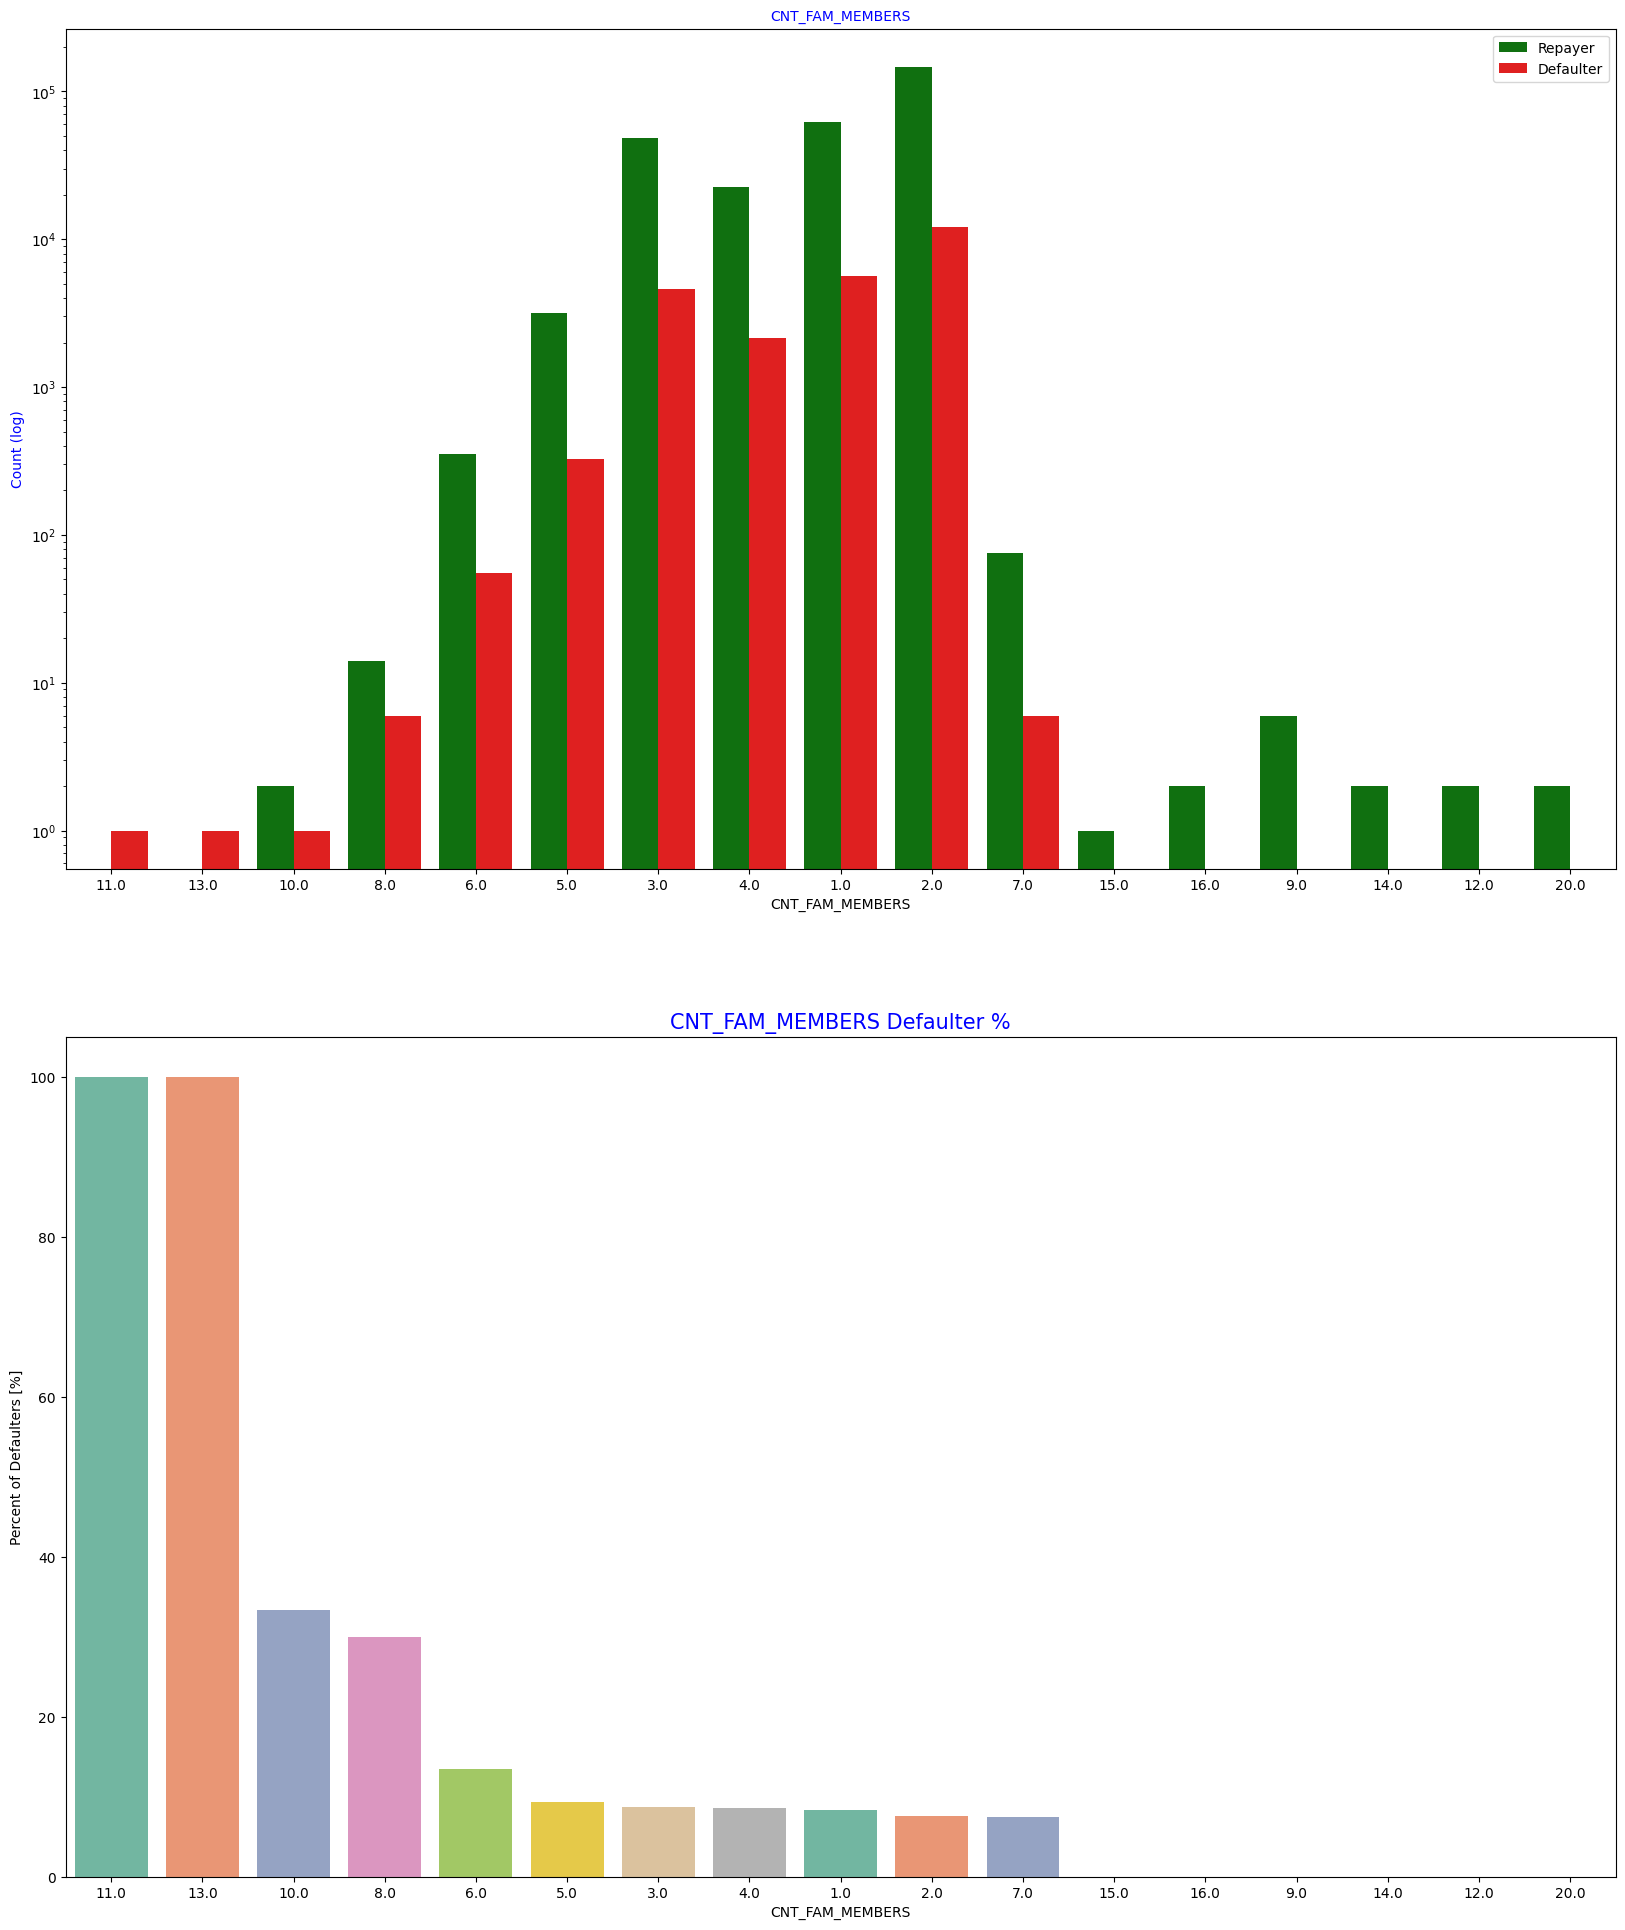

In [618]:
# Analyzing Number of family members based on loan repayment status
uni_cat("CNT_FAM_MEMBERS",True, False, False)

Family member follows the same trend as children where having more family members increases the risk of defaulting

## Multivariate Analysis

In [619]:
Application_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


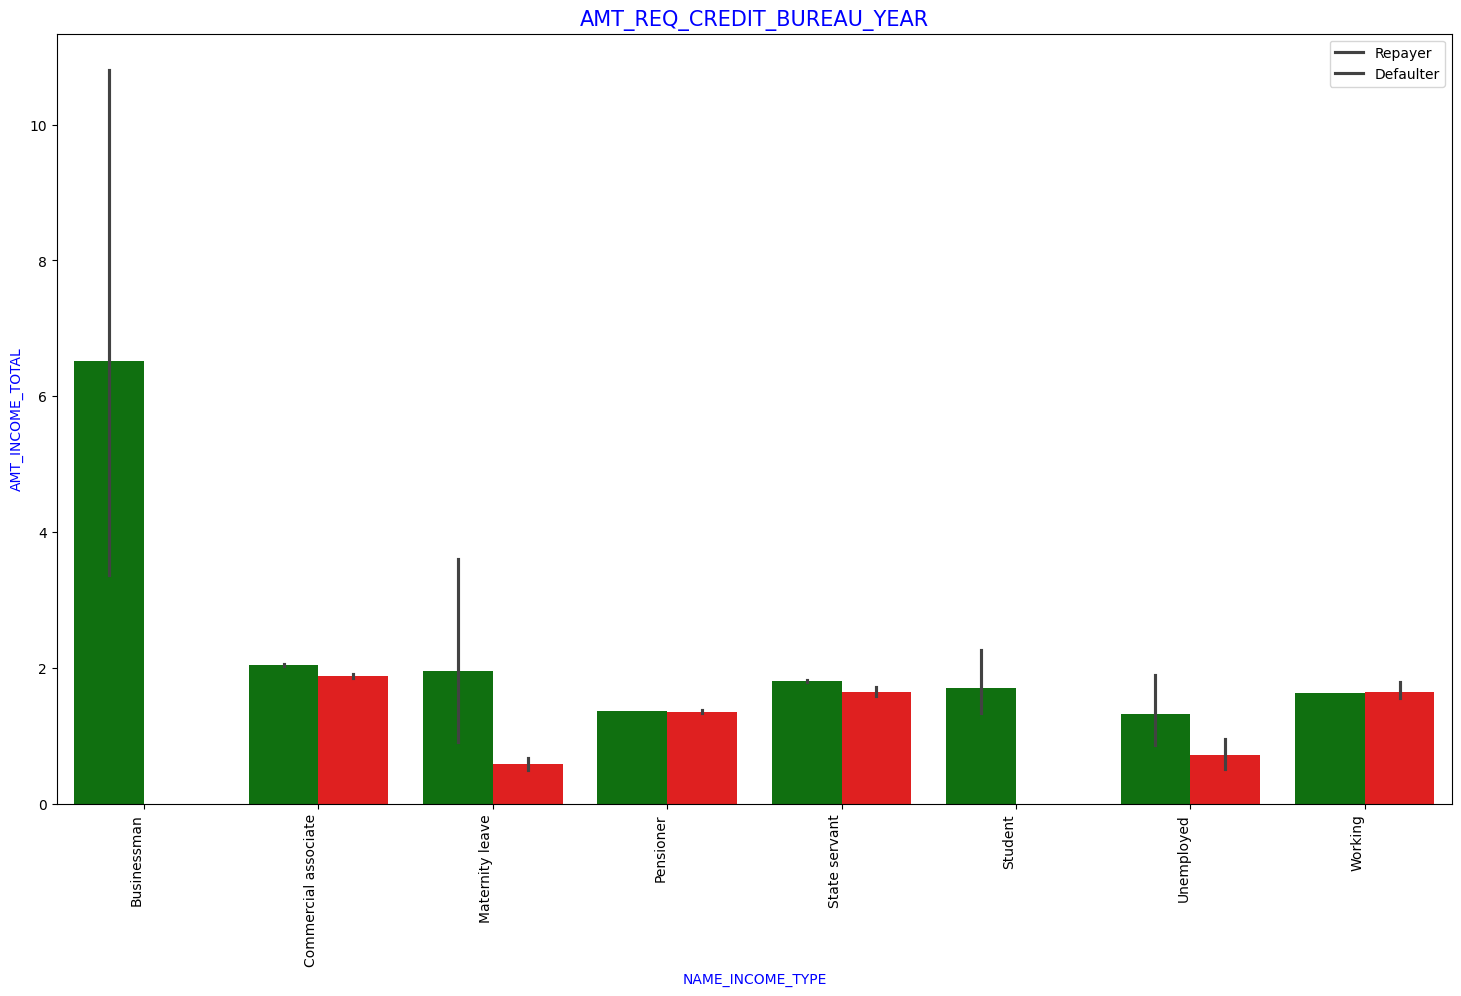

In [627]:
#Income type vs Income Amount Range
bivar_bar("NAME_INCOME_TYPE", "AMT_INCOME_TOTAL", Application_df, "TARGET", (18, 10))


It is observed that businesspeople have the highest income, with a 95% confidence interval suggesting that their income ranges from just under ₹4,00,000 to slightly above ₹10,00,000."

The graph shows the income types of loan applicants and their loan repayment behavior. Businessmen have the highest income, followed by commercial associates and those on maternity leave. Defaulters and repayers show similar patterns across most income types, with no strong indication that income type alone predicts default risk. Businessmen show more income variation but tend to repay more frequently.

## Numeric Variable Analysis

In [628]:
Application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT

In [644]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = Application_df.loc[Application_df['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = Application_df.loc[Application_df['TARGET']==1, cols_for_correlation] # Defaulters

In [645]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

ValueError: could not convert string to float: 'Cash loans'

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

In [ ]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

In [ ]:
## Numerical Univariate Analysis

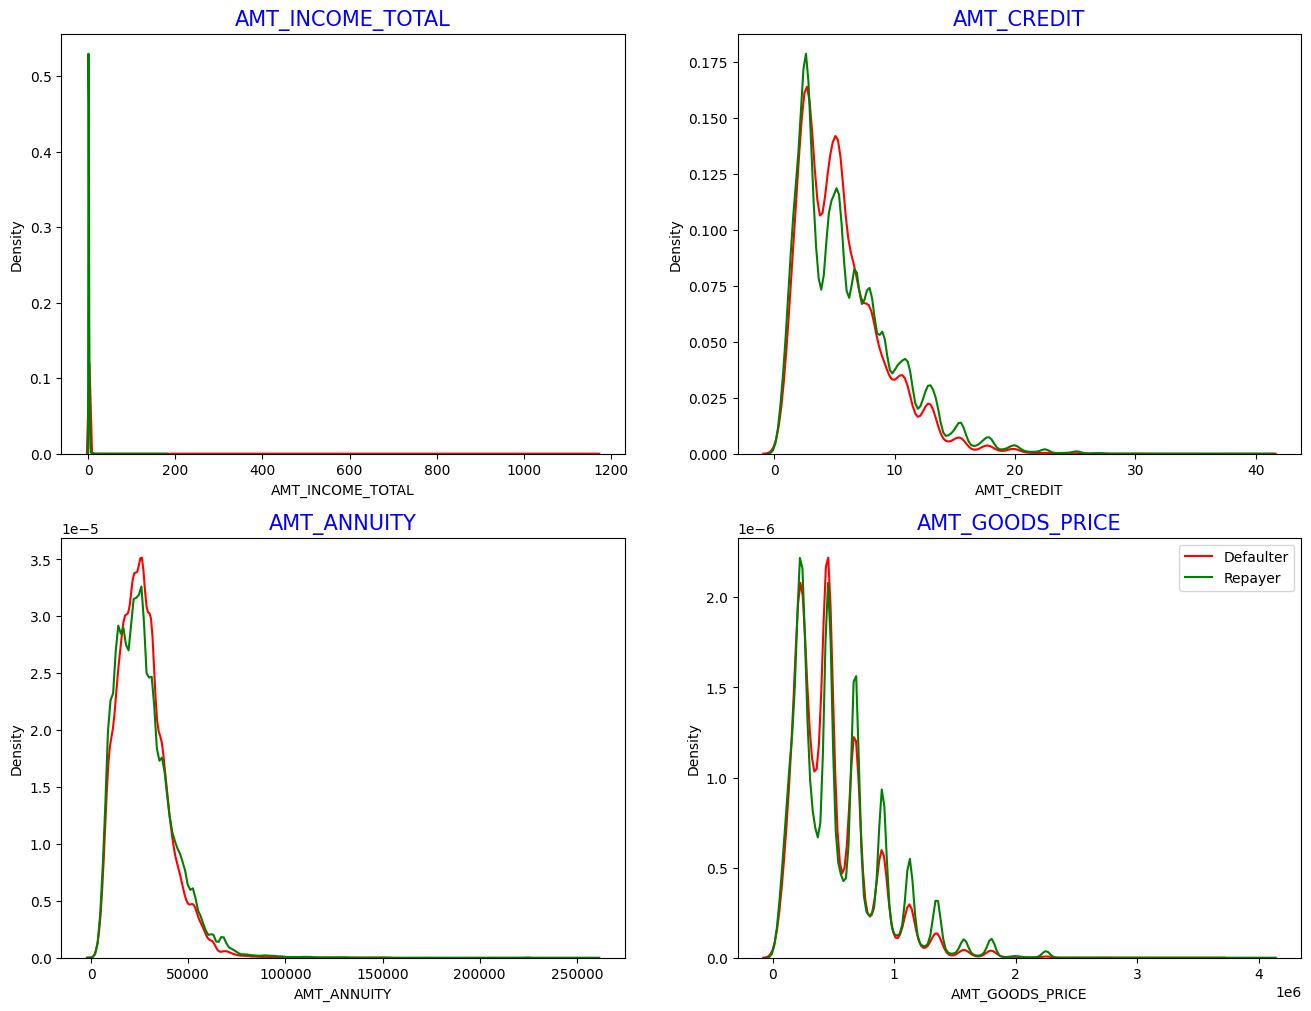

In [647]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = Application_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

Most no of loans are given for goods price below 10 lakhs

Most people pay annuity below 50000 for the credit loan

Credit amount of the loan is mostly less then 10 lakhs

The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

## Numerical Bivariate Analysis

<Figure size 1500x600 with 0 Axes>

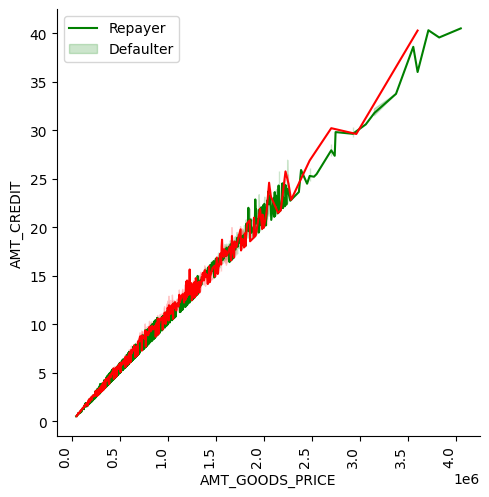

In [649]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',Application_df,"TARGET", "line", ['g','r'], False,(15,6))

When the credit amount exceeds ₹3,000,000, there is a noticeable increase in the number of defaulters.

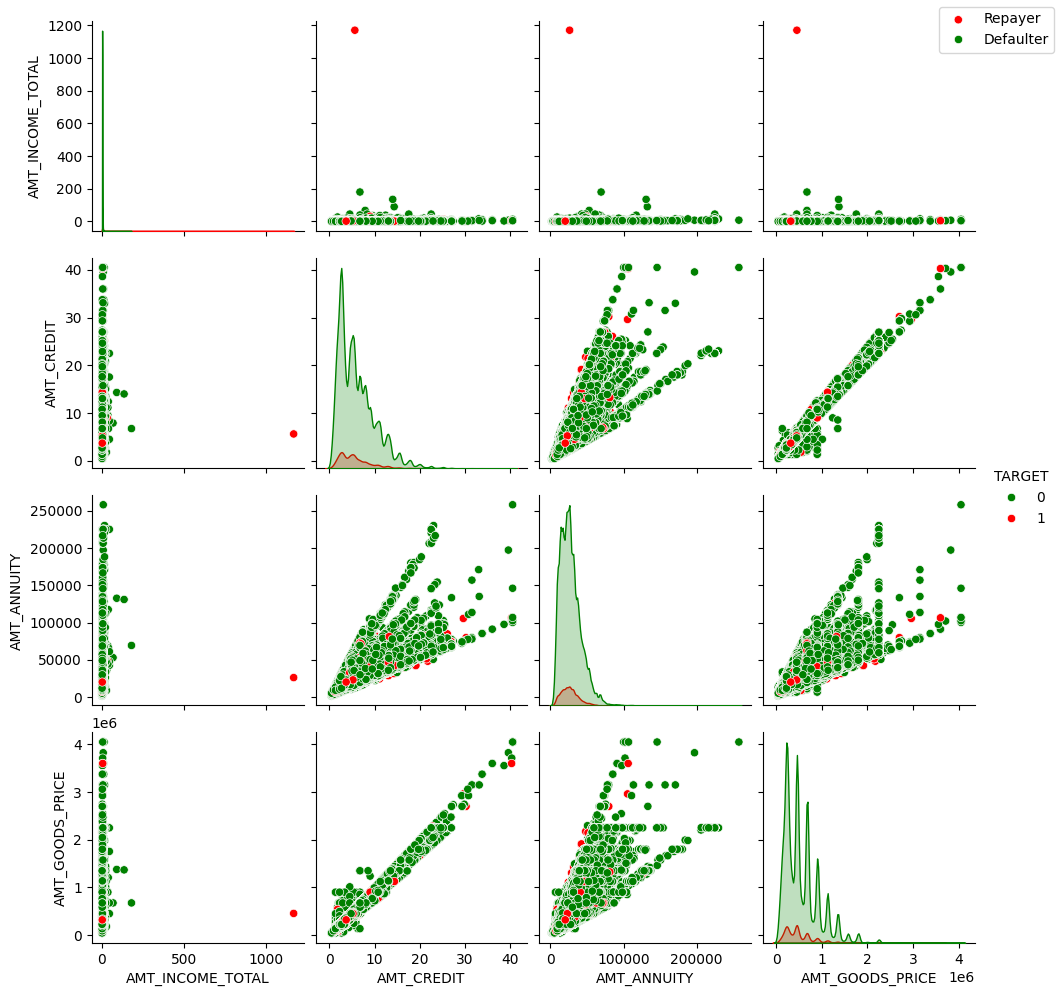

In [651]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = Application_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters

AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line

There are very less defaulters for AMT_CREDIT >3M

Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section

## Merged DataFrame analysis

In [652]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(Application_df, Previous_application_df, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,800-1200


In [653]:
#Check the details 
loan_process_df.shape

(1413701, 94)

In [654]:
# Check the element count 
loan_process_df.size

132887894

In [655]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 94 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [656]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,...,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701702e+04,5.277186e+05,2.074985e-02,1.632105e+04,7.266347e+04,...,4.421384e+01,1.985500e+02,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,1.854396e+05,8.803670e+02,3.149878e+02,1.256367e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.433374e+05,...,1.190217e+01,3.926378e+02,5.327153e+05,1.316370e+04,2.936222e+05,3.194813e+05,2.881244e+05,7.835402e+02,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,...,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,1.042000e+03,...,3.400000e+01,2.000000e+00,1.461346e+06,7.406055e+03,1.975050e+04,2.488050e+04,4.500000e+04,2.710000e+02,-1.000000e+00,0.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,2.401000e+03,...,4.300000e+01,6.000000e+00,1.922698e+06,1.125000e+04,7.087050e+04,8.059500e+04,7.087500e+04,5.820000e+02,4.000000e+00,1.000000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.079840e+00,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,6.313000e+03,...,5.400000e+01,1.700000e+01,2.384012e+06,1.674797e+04,1.800000e+05,2.156400e+05,1.800000e+05,1.313000e+03,8.500000e+01,1.800000e+01
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+03,4.050000e+01,2.250000e+05,4.050000e+06,7.250800e-02,2.520100e+04,3.652430e+05,...,6.900000e+01,1.000000e+03,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.922000e+03,4.000000e+06,8.400000e+01


In [658]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

## Plot Contract Status Vs Purpose of the Loan :

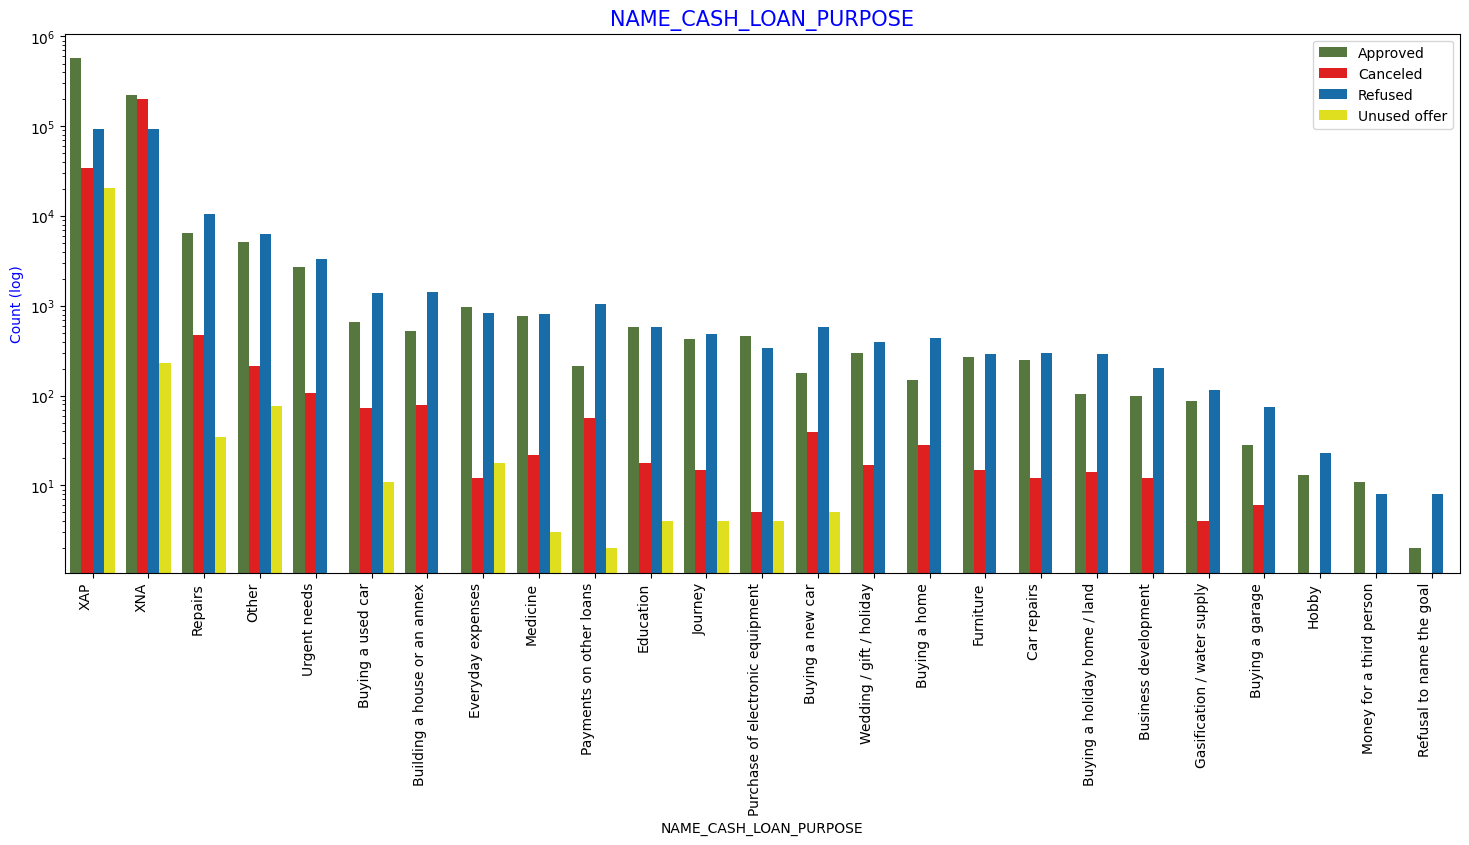

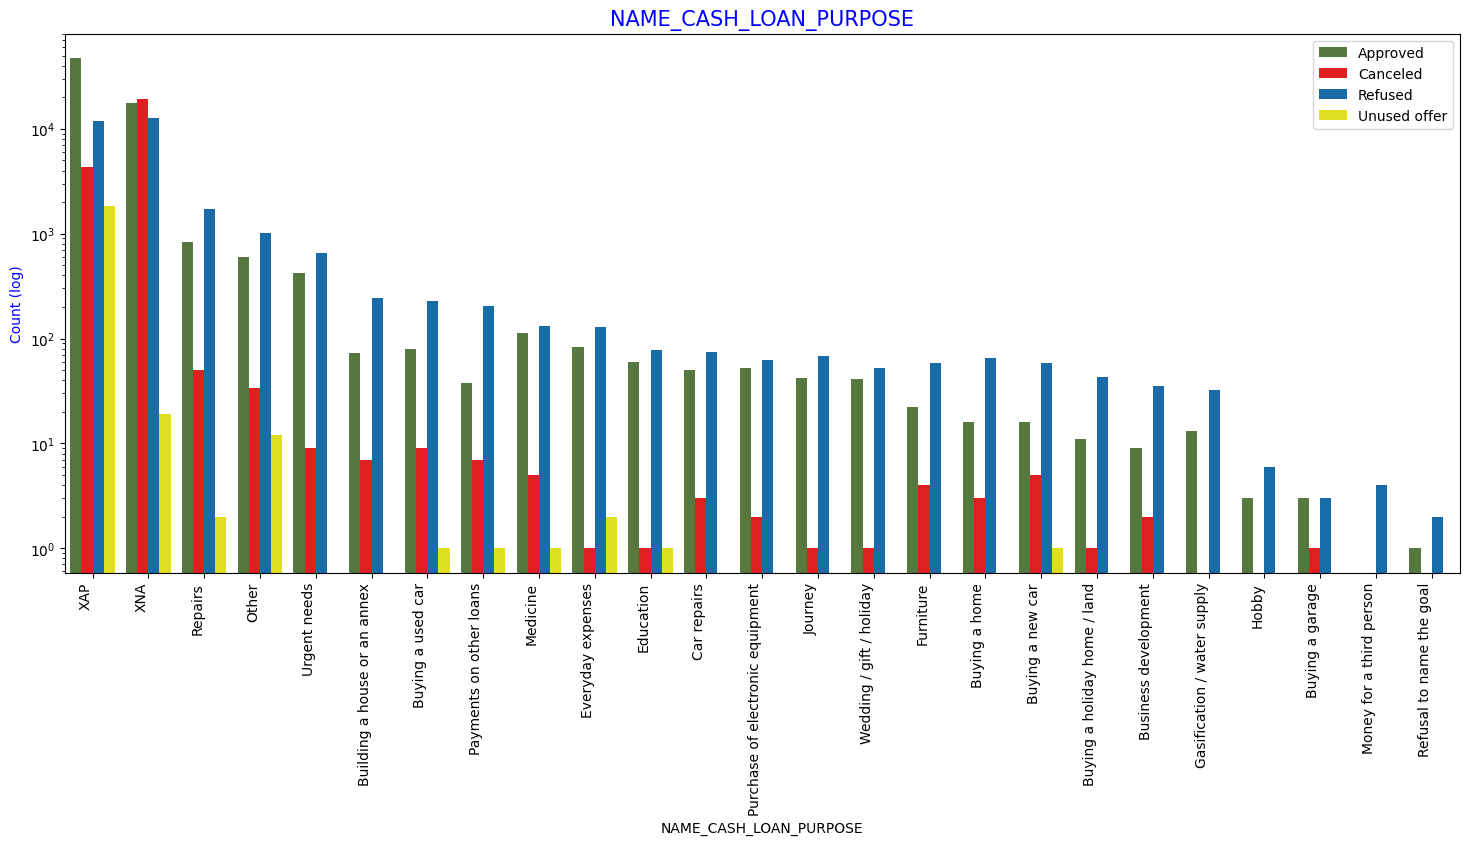

In [659]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

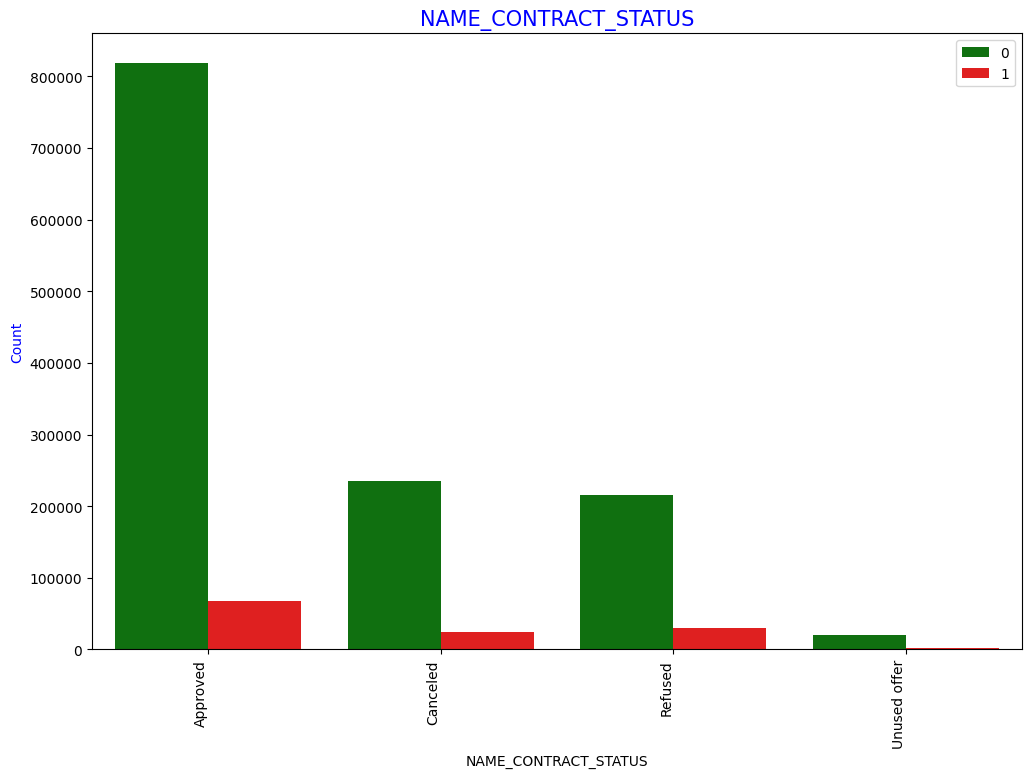

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [660]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

90% of previously canceled clients have successfully repaid their loans. Revisiting interest rates for this group could create additional business opportunities.  

Similarly, 88% of clients who were previously refused a loan have repaid their loans in the current case.  

Recording the reasons for loan refusals is essential for further analysis, as these clients could potentially become reliable, repaying customers in the future.

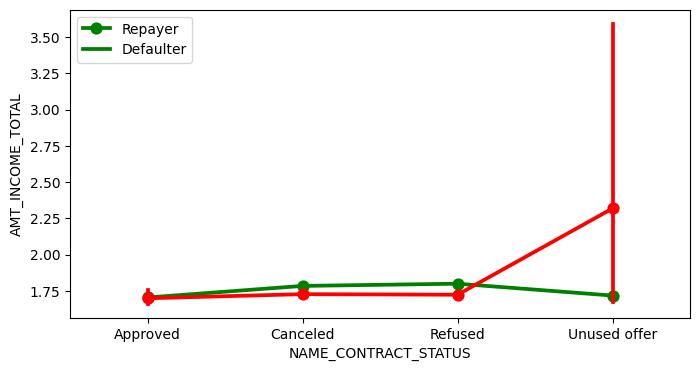

In [661]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

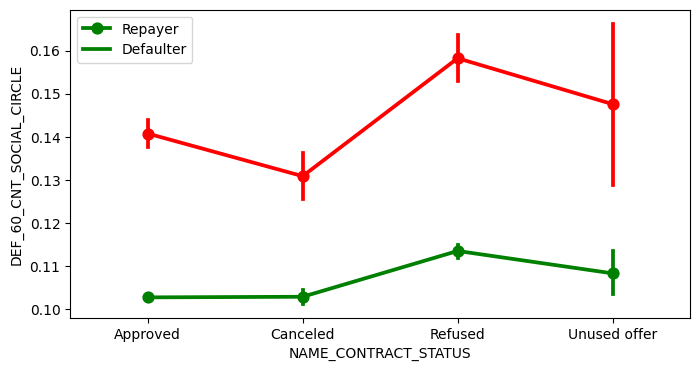

In [662]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

# Conclusion 

After analyzing the datasets, several client attributes have been identified that can help the bank predict whether a client is likely to repay the loan. The findings are summarized below, highlighting the contributing factors and their categorization:

## Decisive Factor whether an applicant will be Repayer:

NAME_EDUCATION_TYPE: Academic degree has less defaults.

NAME_INCOME_TYPE: Student and Businessmen have no defaults.

REGION_RATING_CLIENT: RATING 1 is safer.

ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%

DAYS_BIRTH: People above age of 50 have low probability of defaulting

DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate

AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default

NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.

CNT_CHILDREN: People with zero to two children tend to repay the loans

**Decisive Factors for Identifying Defaulters:**

- **CODE_GENDER**: Men tend to have a relatively higher default rate.
  
- **NAME_FAMILY_STATUS**: People who are single or have a civil marriage exhibit higher default rates.

- **NAME_EDUCATION_TYPE**: Clients with lower secondary or secondary education are more likely to default.

- **NAME_INCOME_TYPE**: Clients on maternity leave or unemployed show a higher probability of defaulting.

- **REGION_RATING_CLIENT**: Clients living in areas with a rating of 3 have the highest default rates.

- **OCCUPATION_TYPE**: Avoid low-skill laborers, drivers, waiters/barmen, security staff, laborers, and cooking staff, as these groups exhibit a high default rate.

- **ORGANIZATION_TYPE**: Organizations with high default rates include:
  - Transport: type 3 (16%)
  - Industry: type 13 (13.5%)
  - Industry: type 8 (12.5%)
  - Restaurant (less than 12% default rate).
  Self-employed individuals also show a relatively high default rate. Loans for such clients should either be avoided or offered with higher interest rates to mitigate the default risk.

- **DAYS_BIRTH**: Young individuals aged 20-40 have a higher probability of defaulting.

- **DAYS_EMPLOYED**: People with less than 5 years of employment experience tend to default more frequently.

- **CNT_CHILDREN & CNT_FAM_MEMBERS**: Clients with 9 or more children have a 100% default rate, making their applications non-viable.

- **AMT_GOODS_PRICE**: When the credit amount exceeds ₹3,000,000, the likelihood of default increases.

**Attributes that Could Lead to Defaults, but Can Be Managed with Higher Interest Rates:**

- **NAME_HOUSING_TYPE**: Many loan applications come from people living in rented apartments or with their parents. These groups tend to default more often. However, because there are a lot of applicants in this category, the bank can still offer loans but with higher interest rates. This way, if they do default, the bank can recover some of the potential losses.

- **AMT_CREDIT**: People applying for loans between ₹300,000 and ₹600,000 tend to default more frequently than those applying for smaller or larger amounts. To manage this risk, the bank could charge a higher interest rate for loans in this range, making it more profitable and compensating for the potential defaults.

- **AMT_INCOME**: A large portion of loan applicants (90%) earn less than ₹300,000 a year, and they are more likely to default. Since these clients represent a significant part of the bank’s customer base, the bank could offer them loans at higher interest rates. This way, even though they have a higher chance of defaulting, the bank can earn more from the interest, balancing the risks.

- **CNT_CHILDREN & CNT_FAM_MEMBERS**: Clients with 4 to 8 children tend to default at a much higher rate. Offering loans to these clients could still be a good option, but the bank should charge higher interest rates for their loans. This helps cover the risks of default while still providing loans to these clients.

- **NAME_CASH_LOAN_PURPOSE**: Loans for repairs have the highest default rate. Many of these loans are either rejected by the bank or refused by clients because the interest rates are too high. This happens because repairs are considered a risky loan purpose. The bank could continue to offer these loans, but with higher interest rates to reduce the potential loss from defaults. If the loan terms are too high for clients to afford, they may refuse the loan, but offering higher rates may still make sense if managed properly.

In summary, while these groups are more likely to default, offering them loans with higher interest rates can help reduce the risk for the bank. This way, the bank can still serve these customers while protecting itself from potential losses.